## Environment Setting and Data Loading

#### Setting

In [1]:
import pandas as pd
import numpy as np

In [2]:
%%time
df_filtered = pd.read_pickle('filtered_data_sentiment_NER.pkl')
df_filtered.head(1)

CPU times: total: 4.86 s
Wall time: 14.8 s


,date,domain,clean_title,clean_text,clean_token,sentiment_score_vader,sentiment_vader,sentiment_svm,sentiment_score_vader_customized,sentiment_vader_customized,NER_word,ORG_NER,PERSON_NER,GPE_NER,sentiment_ner
0,2021-03-18,en.people.cn,Artificial intelligence improves parking effic...,Thanks to the application of an artificial int...,thanks application artificial intelligence ai ...,0.997,Positive,0,0.9961,Positive,"[[ETC, ETC, AI, Wang, ETC, Wang, ETC, Ministry...","[ETC, ETC, AI, Wang, ETC, Wang, ETC, Ministry ...","[Xiang Yanping, Xiang]","[China, Beijing, Chaoyang, Beijing, Beijing, B...",E...


In [4]:
df_filtered.shape

(165530, 15)

#### Get NER sentiment with product

In [15]:
df_sentiment_ner_1 = pd.read_pickle('sentiment_ner_with_product_1.pkl')
df_sentiment_ner_1.head(1)

,sentiment_ner_with_product
0,E...


In [16]:
df_sentiment_ner_2 = pd.read_pickle('sentiment_ner_with_product_2.pkl')

In [17]:
df_sentiment_ner = pd.concat([df_sentiment_ner_1, df_sentiment_ner_2])
df_sentiment_ner.shape

(165530, 1)

In [18]:
sentiment_ner_with_product = df_sentiment_ner.sentiment_ner_with_product.to_list()
len(sentiment_ner_with_product)

165530

In [19]:
df_filtered['sentiment_ner_with_product'] = sentiment_ner_with_product

#### Refiltering

In [20]:
# filter relevant text
keywords = [' artificial intelligence ', ' data science ', ' machine Learning ', ' AI ', ' DS ', ' ML ']

df_refiltered = df_filtered[df_filtered['clean_text'].str.contains('|'.join(keywords), case=False)]
df_refiltered.shape

(135297, 16)

In [21]:
df_refiltered.head(1)

,date,domain,clean_title,clean_text,clean_token,sentiment_score_vader,sentiment_vader,sentiment_svm,sentiment_score_vader_customized,sentiment_vader_customized,NER_word,ORG_NER,PERSON_NER,GPE_NER,sentiment_ner,sentiment_ner_with_product
0,2021-03-18,en.people.cn,Artificial intelligence improves parking effic...,Thanks to the application of an artificial int...,thanks application artificial intelligence ai ...,0.997,Positive,0,0.9961,Positive,"[[ETC, ETC, AI, Wang, ETC, Wang, ETC, Ministry...","[ETC, ETC, AI, Wang, ETC, Wang, ETC, Ministry ...","[Xiang Yanping, Xiang]","[China, Beijing, Chaoyang, Beijing, Beijing, B...",E...,E...


#### Get Roberta Sentiment and Probability

In [22]:
df_sentiment_robert = pd.read_pickle('robert_prob.pkl')
df_sentiment_robert.head(1)

,clean_text
0,"(positive, 0.9996362924575806)"


In [23]:
df_sentiment_robert['sentiment'] = df_sentiment_robert['clean_text'].apply(lambda x: x[0])
df_sentiment_robert['probability'] = df_sentiment_robert['clean_text'].apply(lambda x: x[1])
df_sentiment_robert.head(1)

,clean_text,sentiment,probability
0,"(positive, 0.9996362924575806)",positive,0.999636


In [24]:
sentiment_robert = df_sentiment_robert.sentiment.to_list()
sentiment_robert_prob = df_sentiment_robert.probability.to_list()

In [25]:
sentiment_robert[:1]

['positive']

In [26]:
sentiment_robert_prob[:1]

[0.9996362924575806]

In [28]:
df_refiltered['sentiment_robert'] = sentiment_robert
df_refiltered['sentiment_robert_prob'] = sentiment_robert_prob
df_refiltered.head(1)

C:\Users\Eason Peng\AppData\Local\Temp\ipykernel_29616\922844076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refiltered['sentiment_robert'] = sentiment_robert
C:\Users\Eason Peng\AppData\Local\Temp\ipykernel_29616\922844076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refiltered['sentiment_robert_prob'] = sentiment_robert_prob


,date,domain,clean_title,clean_text,clean_token,sentiment_score_vader,sentiment_vader,sentiment_svm,sentiment_score_vader_customized,sentiment_vader_customized,NER_word,ORG_NER,PERSON_NER,GPE_NER,sentiment_ner,sentiment_ner_with_product,sentiment_robert,sentiment_robert_prob
0,2021-03-18,en.people.cn,Artificial intelligence improves parking effic...,Thanks to the application of an artificial int...,thanks application artificial intelligence ai ...,0.997,Positive,0,0.9961,Positive,"[[ETC, ETC, AI, Wang, ETC, Wang, ETC, Ministry...","[ETC, ETC, AI, Wang, ETC, Wang, ETC, Ministry ...","[Xiang Yanping, Xiang]","[China, Beijing, Chaoyang, Beijing, Beijing, B...",E...,E...,positive,0.999636


#### Get Topic Id

In [29]:
df_topic = pd.read_pickle('df_topic.pkl')
df_topic.head(1)

,date,domain,clean_text,clean_token,sentiment_robert,sentiment_ner_with_product,ktrain_topic,clean_text_without_stopwords,bert_auto_topic_id,ktrain_30_topic_id,ktrain_20_topic_id,ktrain_40_topic_id
0,2021-03-18,en.people.cn,Thanks to the application of an artificial int...,thanks application artificial intelligence ai ...,positive,E...,automotive,Thanks application artificial intelligence ( A...,12,8,15,18


In [30]:
df_topic.shape

(135297, 12)

In [31]:
ktrain_topic = df_topic.ktrain_topic.to_list()
len(ktrain_topic)

135297

In [32]:
df_refiltered['Ktrain_topic'] = ktrain_topic

C:\Users\Eason Peng\AppData\Local\Temp\ipykernel_29616\805085522.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refiltered['Ktrain_topic'] = ktrain_topic


In [33]:
df_refiltered.Ktrain_topic.value_counts()

Others              100735
healthcare            7049
applications          6806
concerns              5173
finance               3613
studio_art            3345
education             2733
related_hardware      2489
cybersecurity         2155
automotive            1199
Name: Ktrain_topic, dtype: int64

#### Discard useless columns

In [398]:
df_final = df_refiltered[['date', 'domain', 'clean_title', 'clean_text', 'sentiment_robert', 'sentiment_robert_prob', 'sentiment_ner_with_product', 'Ktrain_topic']].reset_index(drop = True)
df_final.shape

(135297, 8)

In [399]:
df_final.Ktrain_topic.value_counts()

Others              100735
healthcare            7049
applications          6806
concerns              5173
finance               3613
studio_art            3345
education             2733
related_hardware      2489
cybersecurity         2155
automotive            1199
Name: Ktrain_topic, dtype: int64

In [400]:
df_final.head(1)

,date,domain,clean_title,clean_text,sentiment_robert,sentiment_robert_prob,sentiment_ner_with_product,Ktrain_topic
0,2021-03-18,en.people.cn,Artificial intelligence improves parking efficiency in Chinese cities,"Thanks to the application of an artificial intelligence (AI)-empowered roadside electronic toll collection (ETC) system, China’s capital city Beijing has seen significant improvement in the efficiency of parking fee collection, turnover of roadside parking spots, order in roadside parking, as well as traffic congestion. As the city further deepens its roadside parking reform, the ETC system has almost covered all the roadside parking spaces in the city, with the proportion of vehicles parked...",positive,0.999636,Entity Label Sentiment \ 0 ETC ORG Positive 1 China GPE Positive 2 Beijing GPE Positive 3 ETC ORG Neutral 4 AI ORG Negative 5 Wang PERSO...,automotive


In [401]:
df_final.sentiment_ner_with_product[0].head(1)

,Entity,Label,Sentiment,Sentiment_Score,date
0,ETC,ORG,Positive,0.8957,2021-03-18


#### Process datetime

In [402]:
for idx, row in df_final.iterrows():
    ner_df = row['sentiment_ner_with_product']
    ner_df['date'] = row['date']

    # You can then store this new DataFrame back into the sentiment_ner column, or into a new column.
    df_final.at[idx, 'sentiment_ner_with_product'] = ner_df




In [403]:
df_final.sentiment_ner_with_product[0].head(2)

,Entity,Label,Sentiment,Sentiment_Score,date
0,ETC,ORG,Positive,0.8957,2021-03-18
1,China,GPE,Positive,0.8957,2021-03-18


In [404]:
df_final['date'] = pd.to_datetime(df_final['date'])
df_final['year_month'] = df_final['date'].dt.to_period('M').astype(str)
df_final.year_month.head(2)

0    2021-03
1    2021-03
Name: year_month, dtype: object

In [405]:
df_final.head(1)

,date,domain,clean_title,clean_text,sentiment_robert,sentiment_robert_prob,sentiment_ner_with_product,Ktrain_topic,year_month
0,2021-03-18,en.people.cn,Artificial intelligence improves parking efficiency in Chinese cities,"Thanks to the application of an artificial intelligence (AI)-empowered roadside electronic toll collection (ETC) system, China’s capital city Beijing has seen significant improvement in the efficiency of parking fee collection, turnover of roadside parking spots, order in roadside parking, as well as traffic congestion. As the city further deepens its roadside parking reform, the ETC system has almost covered all the roadside parking spaces in the city, with the proportion of vehicles parked...",positive,0.999636,Entity Label Sentiment \ 0 ETC ORG Positive 1 China GPE Positive 2 Beijing GPE Positive 3 ETC ORG Neutral 4 AI ORG Negative 5 Wang PERSO...,automotive,2021-03


In [406]:
df_final.to_pickle('df_final.pkl')

## Global Analysis 

#### Robeta Sentiment Accuracy Check

In [293]:
summary=summarizer(df_final.clean_text[0], max_length=150, min_length=50)
pprint.pprint(summary)

[{'summary_text': " China's capital city Beijing has seen significant "
                  'improvement in the efficiency of parking fee collection, '
                  'turnover of roadside parking spots, order in roadside '
                  'parking, as well as traffic congestion . With the '
                  'AI-empowered system, drivers can park their vehicles at the '
                  'parking spots on the roadside, and then pay the parking '
                  'charge via their mobile phones'}]


In [294]:
df_final.head(1)

,date,domain,clean_text,sentiment_robert,sentiment_robert_prob,sentiment_ner_with_product,Ktrain_topic,year_month
0,2021-03-18,en.people.cn,"Thanks to the application of an artificial intelligence (AI)-empowered roadside electronic toll collection (ETC) system, China’s capital city Beijing has seen significant improvement in the efficiency of parking fee collection, turnover of roadside parking spots, order in roadside parking, as well as traffic congestion. As the city further deepens its roadside parking reform, the ETC system has almost covered all the roadside parking spaces in the city, with the proportion of vehicles parked...",positive,0.999636,Entity Label Sentiment \ 0 ETC ORG Positive 1 China GPE Positive 2 Beijing GPE Positive 3 ETC ORG Neutral 4 AI ORG Negative 5 Wang PERSO...,automotive,2021-03


#### News-level Sentiment Analysis over Time

In [44]:
import matplotlib.pyplot as plt

def plot_sentiment_timeline(df):

    df = df.copy()
    # One-hot encoding
    df = pd.concat([df, pd.get_dummies(df['sentiment_robert'])], axis=1)

    # Group by date
    df_grouped = df.groupby('year_month').agg({'positive':'sum', 'neutral':'sum', 'negative':'sum'}).reset_index()

    # Plot
    plt.figure(figsize=(15,8))
    plt.plot(df_grouped['year_month'], df_grouped['positive'], label='Positive')
    plt.plot(df_grouped['year_month'], df_grouped['neutral'], label='Neutral')
    plt.plot(df_grouped['year_month'], df_grouped['negative'], label='Negative')

    # Set xticks
    x = df_grouped['year_month']
    indices = range(0, len(x), 3)  # Display a label every 3 months
    plt.xticks(indices, x[indices])

    plt.xlabel('Date')
    plt.ylabel('Count')
    plt.title('Sentiment Counts Over Time')
    plt.legend()
    plt.show()



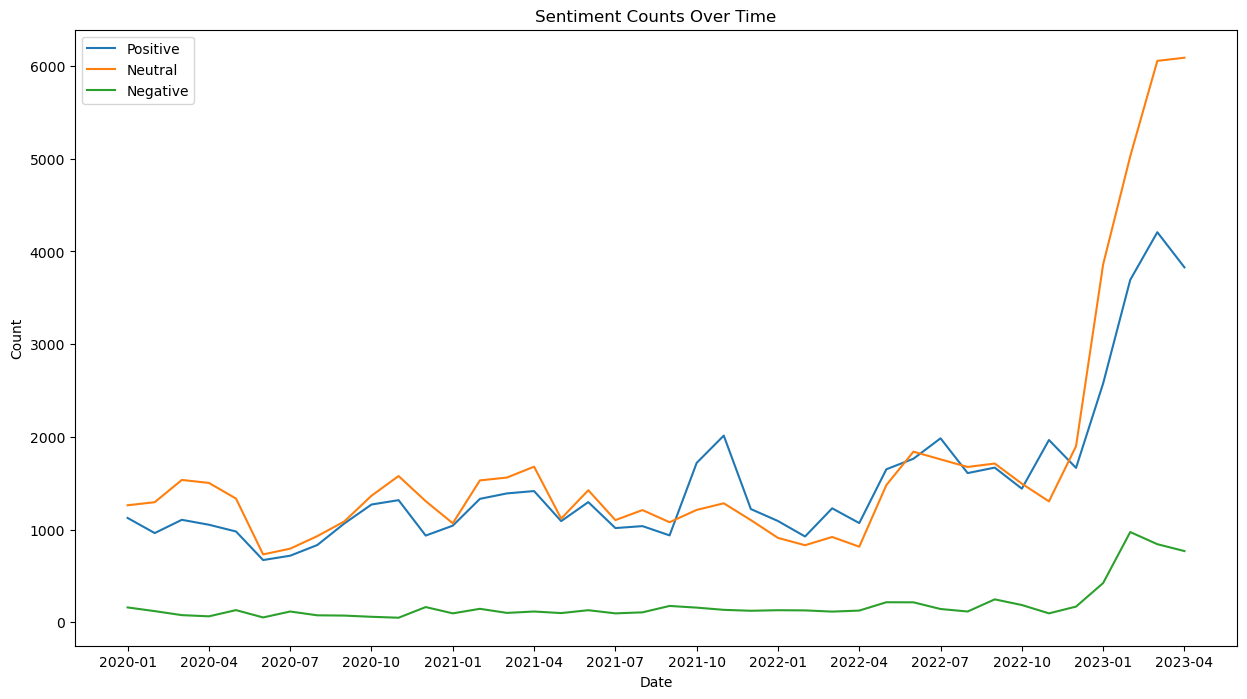

In [45]:
plot_sentiment_timeline(df_final)

#### NER Analysis

In [73]:
def analyze_entity(df, label, threshold, sortby, ascending, n):
    df['Positive'] = df['Sentiment'].apply(lambda x: x == 'Positive')
    df['Negative'] = df['Sentiment'].apply(lambda x: x == 'Negative')

    df_grouped = df.groupby(['Entity', 'Label']).agg(
        total_sentiment=('Sentiment_Score', 'sum'),
        count=('Sentiment_Score', 'count'),
        average_sentiment=('Sentiment_Score', 'mean'),
        positive_count=('Positive', 'sum'),
        negative_count=('Negative', 'sum'),
    ).reset_index()

    df_grouped = df_grouped[df_grouped['Label'] == label]
    df_grouped = df_grouped[df_grouped['count'] > threshold]
    df_grouped = df_grouped.sort_values(by=sortby, ascending=ascending)

    return df_grouped.head(n)

In [327]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def get_word_cloud(df):
    d = {}
    for a, x in df[['Entity', 'average_sentiment']].values:
        d[a] = x

    wordcloud = WordCloud(background_color = 'white', width=1200, height=800)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [109]:
ner_sentiment_all = pd.concat(df_final['sentiment_ner_with_product'].tolist())
ner_sentiment_all.shape

(6299299, 5)

In [115]:
ner_sentiment_all.Label.value_counts()

ORG        3778242
PERSON     1242762
GPE         996645
LOC         166744
PRODUCT     114906
Name: Label, dtype: int64

##### Organization

In [318]:
df_global_positive_org = analyze_entity(ner_sentiment_all, 'ORG', 1000, 'positive_count', False, 100)
analyze_entity(ner_sentiment_all, 'ORG', 1000, 'positive_count', False, 100)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
11256,AI,ORG,192593.6122,569359,0.338264,396407,81970
318930,Google,ORG,15562.8079,69452,0.224080,40865,14339
488408,Microsoft,ORG,18555.6380,60498,0.306715,39920,8214
71197,Artificial Intelligence,ORG,19475.0342,31187,0.624460,29972,1131
355285,IBM,ORG,9131.0202,18447,0.494987,14977,1086
...,...,...,...,...,...,...,...
196892,DDN,ORG,887.5488,1428,0.621533,1345,11
94095,BFSI,ORG,789.2371,1679,0.470064,1336,105
255853,European Union,ORG,532.8136,1797,0.296502,1325,394
238014,EV,ORG,804.4466,1772,0.453977,1316,266


In [333]:
entities_to_drop = ['AI', 'Artificial Intelligence', 'COVID-19', 'ML', 'the Artificial Intelligence'
                    , 'Healthcare', 'Forecast', 'Machine Learning', 'NLP', 'GPU', 'SWOT']

rows_to_drop = df_global_positive_org[df_global_positive_org['Entity'].isin(entities_to_drop)].index

df_global_positive_org = df_global_positive_org.drop(rows_to_drop)
df_global_positive_org.shape

(89, 7)

In [334]:
df_global_positive_org.head(10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
318930,Google,ORG,15562.8079,69452,0.224080,40865,14339
488408,Microsoft,ORG,18555.6380,60498,0.306715,39920,8214
355285,IBM,ORG,9131.0202,18447,0.494987,14977,1086
50136,Amazon,ORG,7412.2253,17360,0.426972,14709,2173
63046,Apple,ORG,5107.7320,14808,0.344931,9802,2302
511409,NYSE,ORG,7297.4324,9961,0.732600,9139,287
374348,Intel,ORG,4808.5497,10732,0.448057,8260,796
101458,Bard,ORG,2326.0523,11317,0.205536,6396,2269
237636,EU,ORG,2417.2678,9846,0.245508,6328,2308
510429,NVIDIA,ORG,3641.3311,7858,0.463392,6163,308


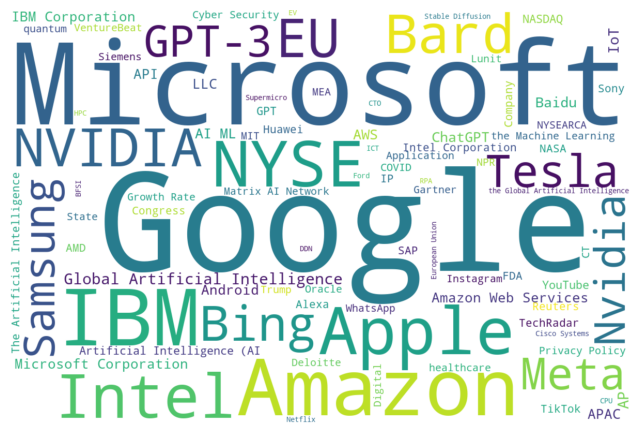

In [335]:
d = {}
for a, x in df_global_positive_org[['Entity', 'positive_count']].values:
    d[a] = x

wordcloud = WordCloud(background_color = 'white', width=1200, height=800)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [336]:
df_global_negative_org = analyze_entity(ner_sentiment_all, 'ORG', 1000, 'negative_count', False, 100)
analyze_entity(ner_sentiment_all, 'ORG', 1000, 'negative_count', False, 100)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
11256,AI,ORG,192593.6122,569359,0.338264,396407,81970
318930,Google,ORG,15562.8079,69452,0.224080,40865,14339
488408,Microsoft,ORG,18555.6380,60498,0.306715,39920,8214
140469,COVID-19,ORG,4889.7012,25170,0.194267,14394,6571
237636,EU,ORG,2417.2678,9846,0.245508,6328,2308
...,...,...,...,...,...,...,...
474732,Matrix AI Network,ORG,593.1340,4056,0.146236,1484,191
286687,GDPR,ORG,307.1806,1028,0.298814,691,188
13635,AI Ethics,ORG,247.4204,1184,0.208970,664,188
240979,Edge,ORG,596.2474,2057,0.289863,1204,184


In [341]:
entities_to_drop = ['AI', 'Artificial Intelligence', 'COVID-19', 'ML', 'the Artificial Intelligence'
                    , 'Healthcare', 'Forecast', 'Machine Learning', 'NLP', 'GPU', 'SWOT', 'AP', 'CT']

rows_to_drop = df_global_negative_org[df_global_negative_org['Entity'].isin(entities_to_drop)].index

df_global_negative_org = df_global_negative_org.drop(rows_to_drop)
df_global_negative_org.shape

(88, 7)

In [342]:
df_global_negative_org.head(10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
318930,Google,ORG,15562.8079,69452,0.224080,40865,14339
488408,Microsoft,ORG,18555.6380,60498,0.306715,39920,8214
237636,EU,ORG,2417.2678,9846,0.245508,6328,2308
63046,Apple,ORG,5107.7320,14808,0.344931,9802,2302
101458,Bard,ORG,2326.0523,11317,0.205536,6396,2269
50136,Amazon,ORG,7412.2253,17360,0.426972,14709,2173
746633,Trump,ORG,-356.9330,3868,-0.092278,1560,2004
113269,Bing,ORG,1750.7351,9627,0.181857,5195,1791
712488,Tesla,ORG,1768.1253,7814,0.226277,4389,1650
484229,Meta,ORG,1686.3191,6809,0.247660,4217,1290


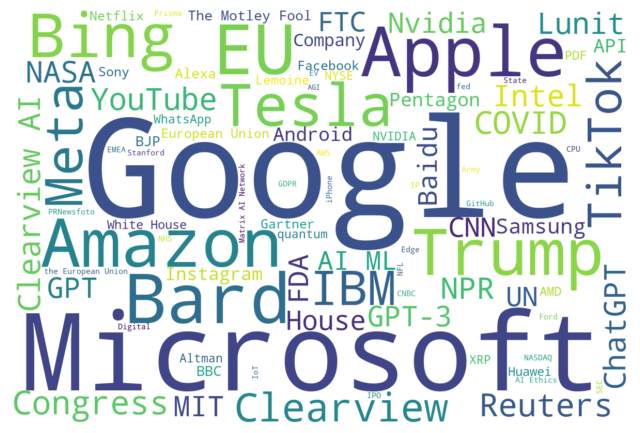

In [373]:
d = {}
for a, x in df_global_negative_org[['Entity', 'negative_count']].values:
    d[a] = x

wordcloud = WordCloud(background_color = 'white', width=1200, height=800)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Person

In [348]:
df_global_positive_person = analyze_entity(ner_sentiment_all, 'PERSON', 500, 'positive_count', False, 100)
analyze_entity(ner_sentiment_all, 'PERSON', 500, 'positive_count', False, 100)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
288489,GPT-4,PERSON,2341.6409,9180,0.255081,5726,1429
666128,Size,PERSON,3809.2369,4212,0.904377,4169,34
748795,Twitter,PERSON,1752.3398,8546,0.205048,4155,1822
246165,Elon Musk,PERSON,1125.5777,6092,0.184763,3590,1553
111105,Biden,PERSON,293.1285,5465,0.053637,2662,2269
...,...,...,...,...,...,...,...
410137,Katy Perry,PERSON,333.2650,525,0.634790,449,69
602844,Raspberry Pi,PERSON,294.1830,573,0.513408,447,57
446719,Lockheed Martin,PERSON,299.7506,532,0.563441,446,43
393149,Jim Thorpe,PERSON,94.9961,850,0.111760,445,339


In [358]:
entities_to_drop = ['AI', 'Artificial Intelligence', 'COVID-19', 'ML', 'the Artificial Intelligence'
                    , 'Healthcare', 'Forecast', 'Machine Learning', 'NLP', 'GPU', 'SWOT', 'GPT-4'
                    , 'Size', 'Twitter', 'Midjourney', 'Outlook', 'Covid', 'Siri', 'Forecasts', 'Privacy Policy',
                    'OpenAI', 'Adobe', 'Google Cloud']

rows_to_drop = df_global_positive_person[df_global_positive_person['Entity'].isin(entities_to_drop)].index

df_global_positive_person = df_global_positive_person.drop(rows_to_drop)
df_global_positive_person.shape

(85, 7)

In [359]:
df_global_positive_person.head(10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
246165,Elon Musk,PERSON,1125.5777,6092,0.184763,3590,1553
111105,Biden,PERSON,293.1285,5465,0.053637,2662,2269
504847,Musk,PERSON,445.5572,5286,0.084290,2456,1840
570765,Pichai,PERSON,805.2338,2637,0.305360,1830,394
691842,Sundar Pichai,PERSON,542.7593,2348,0.231158,1371,440
416418,Kim Kardashian,PERSON,913.5951,1699,0.537725,1327,349
638339,Sam Altman,PERSON,368.5125,2320,0.158842,1155,462
337193,Harry,PERSON,607.4831,1552,0.391420,1087,434
394502,Joe Biden,PERSON,366.4141,1771,0.206897,1065,514
38921,Ai Weiwei,PERSON,272.2791,1950,0.139630,1043,506


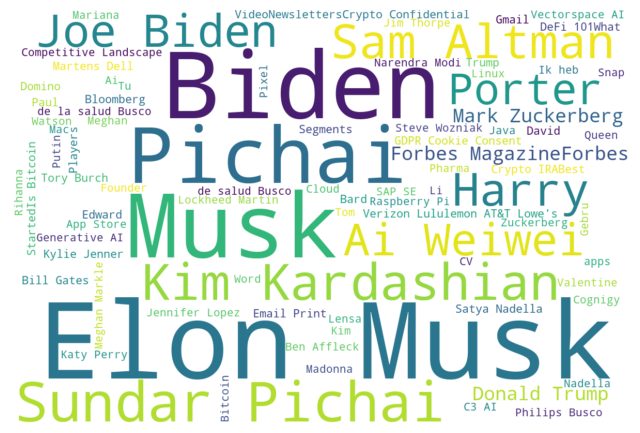

In [360]:
d = {}
for a, x in df_global_positive_person[['Entity', 'positive_count']].values:
    d[a] = x

wordcloud = WordCloud(background_color = 'white', width=1200, height=800)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [361]:
df_global_negative_person = analyze_entity(ner_sentiment_all, 'PERSON', 500, 'negative_count', False, 100)

In [362]:
entities_to_drop = ['AI', 'Artificial Intelligence', 'COVID-19', 'ML', 'the Artificial Intelligence'
                    , 'Healthcare', 'Forecast', 'Machine Learning', 'NLP', 'GPU', 'SWOT', 'GPT-4'
                    , 'Size', 'Twitter', 'Midjourney', 'Outlook', 'Covid', 'Siri', 'Forecasts', 'Privacy Policy',
                    'OpenAI', 'Adobe', 'Google Cloud']

rows_to_drop = df_global_negative_person[df_global_negative_person['Entity'].isin(entities_to_drop)].index

df_global_negative_person = df_global_negative_person.drop(rows_to_drop)
df_global_negative_person.shape

(87, 7)

In [363]:
df_global_negative_person.head(10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
111105,Biden,PERSON,293.1285,5465,0.053637,2662,2269
504847,Musk,PERSON,445.5572,5286,0.084290,2456,1840
246165,Elon Musk,PERSON,1125.5777,6092,0.184763,3590,1553
227037,Donald Trump,PERSON,9.2502,2051,0.004510,928,937
747373,Tu,PERSON,-58.3718,2018,-0.028926,452,815
293302,Gebru,PERSON,-118.4375,1465,-0.080845,583,721
248800,Endgültigen Bedingungen,PERSON,-553.6820,678,-0.816640,5,673
618571,Risiken,PERSON,-552.8013,679,-0.814140,6,673
58723,Anlageentscheidung,PERSON,-553.6820,678,-0.816640,5,673
590274,Putin,PERSON,-10.8415,1218,-0.008901,559,605


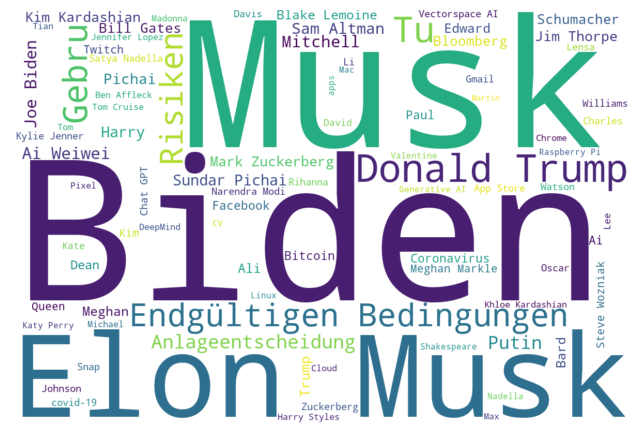

In [371]:
d = {}
for a, x in df_global_negative_person[['Entity', 'negative_count']].values:
    d[a] = x

wordcloud = WordCloud(background_color = 'white', width=1200, height=800)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Location

In [366]:
df_global_positive_location = analyze_entity(ner_sentiment_all, 'GPE', 500, 'positive_count', False, 100)

entities_to_drop = ['AI', 'Artificial Intelligence', 'COVID-19', 'ML', 'the Artificial Intelligence'
                    , 'Healthcare', 'Forecast', 'Machine Learning', 'NLP', 'GPU', 'SWOT', 'GPT-4'
                    , 'Size', 'Twitter', 'Midjourney', 'Outlook', 'Covid', 'Siri', 'Forecasts', 'Privacy Policy',
                    'OpenAI', 'Adobe', 'Google Cloud']

rows_to_drop = df_global_positive_location[df_global_positive_location['Entity'].isin(entities_to_drop)].index

df_global_positive_location = df_global_positive_location.drop(rows_to_drop)
df_global_positive_location.shape

(98, 7)

In [368]:
df_global_positive_location.head(10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
753800,US,GPE,12828.5383,43785,0.292989,27560,7995
365436,India,GPE,14141.7810,36431,0.388180,25922,5690
162464,China,GPE,11225.4712,36427,0.308163,24154,6987
750698,U.S.,GPE,7127.2631,31980,0.222866,18362,6928
752344,UK,GPE,7640.1581,20072,0.380638,13856,3727
387000,Japan,GPE,6615.7266,14264,0.463806,10875,1279
147166,Canada,GPE,4838.0365,12020,0.402499,8611,1683
297049,Germany,GPE,5407.8309,11495,0.470451,8569,996
280341,France,GPE,4522.2254,10085,0.448411,7390,1092
878643,the United States,GPE,3849.0415,7891,0.487776,6931,938


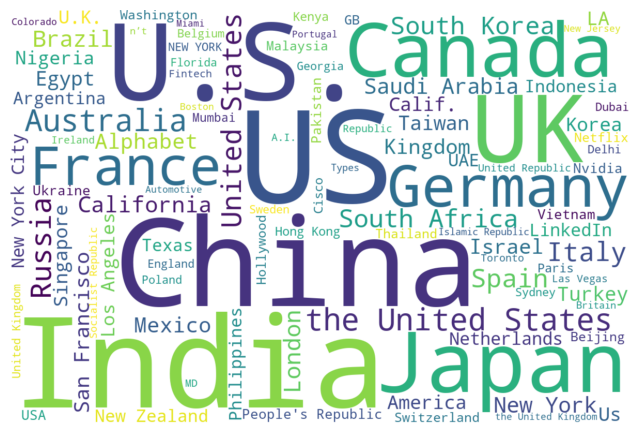

In [369]:
d = {}
for a, x in df_global_positive_location[['Entity', 'positive_count']].values:
    d[a] = x

wordcloud = WordCloud(background_color = 'white', width=1200, height=800)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [374]:
df_global_negative_location = analyze_entity(ner_sentiment_all, 'GPE', 500, 'negative_count', False, 100)

entities_to_drop = ['AI', 'Artificial Intelligence', 'COVID-19', 'ML', 'the Artificial Intelligence'
                    , 'Healthcare', 'Forecast', 'Machine Learning', 'NLP', 'GPU', 'SWOT', 'GPT-4'
                    , 'Size', 'Twitter', 'Midjourney', 'Outlook', 'Covid', 'Siri', 'Forecasts', 'Privacy Policy',
                    'OpenAI', 'Adobe', 'Google Cloud']

rows_to_drop = df_global_negative_location[df_global_negative_location['Entity'].isin(entities_to_drop)].index

df_global_negative_location = df_global_negative_location.drop(rows_to_drop)
df_global_negative_location.shape

(98, 7)

In [375]:
df_global_negative_location.head(10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
753800,US,GPE,12828.5383,43785,0.292989,27560,7995
162464,China,GPE,11225.4712,36427,0.308163,24154,6987
750698,U.S.,GPE,7127.2631,31980,0.222866,18362,6928
365436,India,GPE,14141.7810,36431,0.388180,25922,5690
752344,UK,GPE,7640.1581,20072,0.380638,13856,3727
627781,Russia,GPE,1900.4362,10675,0.178027,5905,3388
756354,Ukraine,GPE,-673.2028,5241,-0.128449,1888,2965
147166,Canada,GPE,4838.0365,12020,0.402499,8611,1683
380473,Italy,GPE,2534.8481,8105,0.312751,5139,1631
145372,California,GPE,1215.5254,6840,0.177708,3696,1607


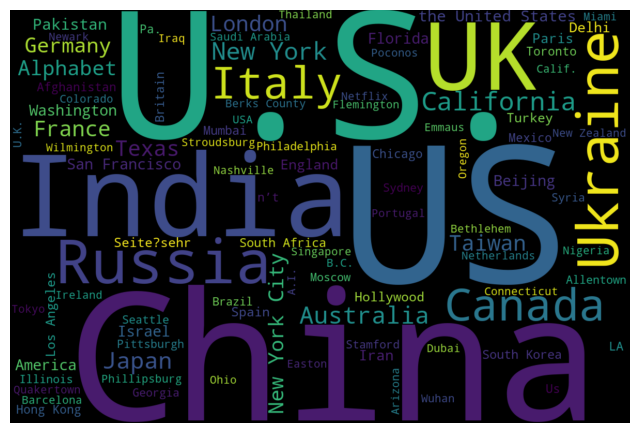

In [379]:
d = {}
for a, x in df_global_negative_location[['Entity', 'negative_count']].values:
    d[a] = x

wordcloud = WordCloud(background_color = 'black', width=1200, height=800)
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### Concern Aanalysis

In [281]:
import os
import pandas as pd 
import numpy as np
import datetime
import pytz
import pprint
import warnings

from transformers import pipeline, AutoTokenizer, AutoModelForSeq2SeqLM, AutoModelWithLMHead

warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', 500)

In [282]:
summarizer = pipeline("summarization", model = "sshleifer/distilbart-cnn-6-6", framework='pt')

In [407]:
df_concern = df_final[df_final.Ktrain_topic == 'concerns']
df_concern.shape

(5173, 9)

In [410]:
top10_negative_concerns = df_concern[df_concern['sentiment_robert'] == 'negative'].sort_values('sentiment_robert_prob', ascending=False).head(10).reset_index(drop=True)

In [412]:
top10_negative_concerns.head(10)

,date,domain,clean_title,clean_text,sentiment_robert,sentiment_robert_prob,sentiment_ner_with_product,Ktrain_topic,year_month
0,2020-12-04,www.stamfordadvocate.com,"Google AI researcher's exit sparks ethics, bias concerns","Darien eager for a chance to erase the bitter memory of last Stamford-based IT firm ISG sees revenue drop, posts profit in Q3 What does it take to put on a musical? Find out when ACT of CT Mike Gaffney targets laughs in 3-night gig at Comix in Mohegan Stamford coffee brewers make CT Magazine's 40 Under 40 Class of FILE - This Thursday, Jan. 3, 2013, file photo shows Google's headquarters in Mountain View, Calif. Prominent artificial intelligence scholar Timnit Gebru helped improve Google's ...",negative,0.998414,Entity Label Sentiment Sentiment_Score date 0 Darien GPE Positive 0.3612 2020-12-04 1 Stamford GPE Positive 0.3612 2020-12-04 2 ISG ORG Positive 0.3612 2020-12-04 3 Q3 PRODUCT Positive 0.3612 2020-12-04 4 Mike Gaffney PERSON Positive 0.4939 2020-12-04 .. ... ... ... ... ... 84 AP ...,concerns,2020-12
1,2020-12-09,www.stamfordadvocate.com,Google CEO says company will review AI scholar's abrupt exit,"Stamford-based IT firm ISG sees revenue drop, posts profit in Q3 Carpenters hits will be ‘Close to You’ in concert to aid Yule gambit: 6 streaming TV shows to include in your gift Stamford coffee brewers make CT Magazine's 40 Under 40 Class of Google CEO Sundar Pichai has apologized for how a prominent artificial intelligence researcher's abrupt departure last week has “seeded doubts” in the company. Pichai told Google employees in a Wednesday memo obtained by Axios that the tech company is...",negative,0.998381,Entity Label Sentiment Sentiment_Score date 0 Stamford GPE Positive 0.8519 2020-12-09 1 ISG ORG Positive 0.8519 2020-12-09 2 Q3 Carpenters PERSON Positive 0.8519 2020-12-09 3 Stamford GPE Positive 0.8519 2020-12-09 4 CT Magazine's ORG Positive 0.8519 2020-12-09 5 Google ORG Positive 0.8519 2020-12-09 6 Sundar Pichai PERSON Positi...,concerns,2020-12
2,2022-01-12,shepherdgazette.com,More than every third company burned by AI bias,"The Shepherd of the Hills Gazette - News, Views and More Distortions in AI systems can lead to significant losses for companies, according to a new survey by an enterprise AI company. More than one in three companies (36 percent) said they suffered losses due to AI bias in one or more algorithms, the DataRobot survey of over 350 US and UK technologists, including CIOs, IT directors, IT manager, data scientist and developer. Leads who are using or planning to use AI. According to research con...",negative,0.998088,Entity Label Sentiment \ 0 the Hills Gazette - News GPE Negative 1 Views ORG Negative 2 AI ORG Negative 3 AI ORG Negative 4 DataRobot ORG Negative 5 ...,concerns,2022-01
3,2023-02-22,www.mercurynews.com,Editorial: California must lead in crafting AI protections,"Share this:Click to share on Facebook (Opens in new window)Click to share on Twitter (Opens in new window)Click to print (Opens in new window)Click to email a link to a friend (Opens in new window)Click to share on Reddit (Opens in new window) Tech, life science job cuts: hundreds more layoffs jolt Bay Area OpinionEditorialsNews, OpinionNews, Opinion Based on facts, either observed and verified directly by the reporter, or reported and verified from knowledgeable sources., Advocates for idea...",negative,0.998079,Entity Label Sentiment \ 0 Twitter PERSON Positive 1 Opens ORG Positive 2 Opens ORG Positive 3 Bay Area LOC Positive 4 OpinionNews ORG Positive 5 ...,concerns,2023-02
4,2020-07-12,inews.co.uk,European Commission outlines proposals for AI regulation to protect public,"Getty)The European Commission is planning new rules surrounding artificial standards (AI) to keep the public safe, separate from technologies developed in the US and China.Speaking at a conference ahead of the publication of the AI white paper, Margrethe Vestager, executive vice president of the European Commission, said the strategy

In [286]:
text = '''
Darien eager for a chance to erase the bitter memory of last Stamford-based IT firm ISG sees revenue drop, posts profit in Q3 
What does it take to put on a musical? Find out when ACT of CT Mike Gaffney targets laughs in 3-night gig at Comix in Mohegan Stamford 
coffee brewers make CT Magazine\'s 40 Under 40 Class of FILE - This Thursday, Jan. 3, 2013, file photo shows Google\'s headquarters 
in Mountain View, Calif. Prominent artificial intelligence scholar Timnit Gebru helped improve Google\'s public image as a company 
that elevates Black computer scientists and questions harmful uses of AI technology. less FILE - This Thursday, Jan. 3, 2013, 
file photo shows Google\'s headquarters in Mountain View, Calif. Prominent artificial intelligence scholar Timnit Gebru helped 
improve Google\'s public image as a company that ... more FILE - This Thursday, Jan. 3, 2013, file photo shows Google\'s headquarters 
in Mountain View, Calif. Prominent artificial intelligence scholar Timnit Gebru helped improve Google\'s public image as a company 
that elevates Black computer scientists and questions harmful uses of AI technology. less FILE - This Thursday, Jan. 3, 2013, 
file photo shows Google\'s headquarters in Mountain View, Calif. Prominent artificial intelligence scholar Timnit Gebru helped 
improve Google\'s public image as a company that ... more Prominent artificial intelligence scholar Timnit Gebru helped improve 
Google\'s public image as a company that elevates Black computer scientists and questions harmful uses of AI technology. But 
internally, Gebru, a leader in the field of AI ethics, was not shy about voicing doubts about those commitments — until she was 
pushed out of the company this week in a dispute over a research paper examining the societal dangers of an emerging branch of AI. 
Gebru announced on Twitter she was fired. Google told employees she resigned. More than 1,200 Google employees have signed on to 
an open letter calling the incident “unprecedented research censorship” and faulting the company for racism and defensiveness. 
The furor over Gebru’s abrupt departure is the latest incident raising questions about whether Google has strayed so far away 
from its original “Don’t Be Evil” motto that the company now routinely ousts employees who dare to challenge management. 
The exit of Gebru, who is Black, also raised further doubts about diversity and inclusion at a company where Black women 
account for just 1.6% of the workforce. And it\'s exposed concerns beyond Google about whether showy efforts at ethical AI — 
ranging from a White House executive order this week to ethics review teams set up throughout the tech industry — are of little 
use when their conclusions might threaten profits or national interests. Gebru has been a star in the AI ethics world who spent 
her early tech career working on Apple products and got her doctorate studying computer vision at the Stanford Artificial 
Intelligence Laboratory. She\'s co-founder of the group Black in AI, which promotes Black employment and leadership in the field.
 She\'s known for a landmark 2018 study that found racial and gender bias in facial recognition software. Besides flagging the 
 potential dangers of bias, the paper also cited the environmental cost of chugging so much energy to run the models — 
 an important issue at a company that brags about its commitment to being carbon neutral since 2007 as it strives to become even 
 greener. Google managers had concerns about omissions in the work and its timing, and wanted the names of Google employees taken 
 off the study, but Gebru objected, according to an exchange of emails shared with the AP and first published by Platformer. 
 Jeff Dean, Google\'s chief of AI research, reiterated Google\'s position about the study in a statement Friday. The paper raised 
 valid points but “had some important gaps that prevented us from being comfortable putting Google affiliation on it,” Dean wrote. 
 “For example, it didn’t include important findings on how models can be made more efficient and actually reduce overall 
 environmental impact, and it didn’t take into account some recent work at Google and elsewhere on mitigating bias," Dean added. 
 Gebru on Tuesday vented her frustrations about the process to an internal diversity-and-inclusion email group at Google, 
 with the subject line: “Silencing Marginalized Voices in Every Way Possible." Gebru said on Twitter that\'s the email that got 
 her fired. Dean, in an email to employees, said the company accepted “her decision to resign from Google” because she told managers
 she\'d leave if her demands about the study were not met. 
'''

In [287]:
summary=summarizer(text, max_length=150, min_length=50)
pprint.pprint(summary)

[{'summary_text': 'Prominent artificial intelligence scholar Timnit Gebru '
                  "helped improve Google's public image as a company that "
                  'elevates Black computer scientists and questions harmful '
                  'uses of AI technology . She was fired from the company this '
                  'week in a dispute over a research paper examining the '
                  'societal dangers of an emerging branch of AI .'}]


In [289]:
summary=summarizer(top10_negative_concerns.clean_text[3], max_length=150, min_length=50)
pprint.pprint(summary)

[{'summary_text': 'For years, consumer confidence in tech products has been '
                  'falling at alarming rates . Google’s much-hyped new AI '
                  'chatbot tool Bard touted an inaccurate response during a '
                  'demo earlier this month . Tech companies say they have '
                  'internal guidelines they follow when building AI, but the '
                  'Bing experience hardly builds confidence in its '
                  'self-imposed'}]


In [290]:
summary=summarizer(top10_negative_concerns.clean_text[4], max_length=150, min_length=50)
pprint.pprint(summary)

[{'summary_text': 'European Commission is planning new rules surrounding '
                  'artificial standards (AI) to keep the public safe, separate '
                  'from technologies developed in the US and China . The '
                  'proposals include training AI algorithms to overcome '
                  'potential bias in systems and make sure datasets are '
                  'representative of populations in terms of age, gender'}]


In [291]:
summary=summarizer(top10_negative_concerns.clean_text[5], max_length=150, min_length=50)
pprint.pprint(summary)

[{'summary_text': ' Capgemini report says 70% of customers expect fair AI '
                  'interactions from firms . Discriminatory bias of AI systems '
                  'and negative AI customer experiences come at a high cost '
                  'for organisations . Share of customers who believe '
                  'organisations are being fully transparent about how they '
                  'are using their personal data has fallen from 76% in 2019 '
                  'to 62% today'}]


In [292]:
summary=summarizer(top10_negative_concerns.clean_text[6], max_length=150, min_length=50)
pprint.pprint(summary)

[{'summary_text': ' Corporates are using Artificial Intelligence (AI) '
                  'platforms in the interview process to simplify and speed up '
                  'hiring . But real world use of AI highlights concerns that '
                  'discrimination caused by flaws in the technology and '
                  'associated processes is causing suitable candidates to miss '
                  'the short list . The coronavirus pandemic has really '
                  'impacted the global job market, with nearly all'}]


In [223]:
concern_ner_all = pd.concat(df_concern.sentiment_ner_with_product.to_list())
concern_ner_all.head(1)

,Entity,Label,Sentiment,Sentiment_Score,date
0,CAIDP,ORG,Neutral,0.0,2023-03-31


In [270]:
analyze_entity(concern_ner_all, 'ORG', 100, 'average_sentiment', False, 10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
23434,Opens,ORG,117.9069,131,0.900053,128,3
746,AI Risk Management Framework,ORG,71.1438,109,0.652695,96,12
17893,Kratsios,ORG,67.0075,103,0.650558,92,4
19812,Margrethe Vestager,ORG,74.4325,129,0.576996,128,1
26863,SEEDS Capital,ORG,60.6104,108,0.561207,81,0
34114,X0PA,ORG,119.2948,215,0.554860,188,0
31207,The White House,ORG,196.3190,382,0.513924,287,15
3076,Artificial Intelligence,ORG,208.7063,432,0.483116,393,38
32224,UNESCO,ORG,99.5252,210,0.473930,169,24
23124,OECD,ORG,56.1165,126,0.445369,98,8


In [227]:
analyze_entity(concern_ner_all, 'PRODUCT', 100, 'negative_count', False, 10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
31976,Twitter,PRODUCT,-30.5191,405,-0.075356,138,220
8982,DeepMind,PRODUCT,28.0710,142,0.197683,81,33
11547,FairPlay,PRODUCT,65.4960,167,0.392192,164,1


#### Source Analysis

In [46]:
df_analysis = df_final.copy()

In [47]:
df_analysis.domain.head(1)

0    en.people.cn
Name: domain, dtype: object

In [48]:
df_analysis['is_positive'] = df_analysis['sentiment_robert'] == 'positive'
df_analysis['is_neutral'] = df_analysis['sentiment_robert'] == 'neutral'
df_analysis['is_negative'] = df_analysis['sentiment_robert'] == 'negative'


df_analysis_filtered = df_analysis.groupby('domain').filter(lambda x: len(x) >= 100)


sentiment_ratio_per_domain = df_analysis_filtered.groupby('domain').agg(
    positive_ratio=('is_positive', 'mean'),
    neutral_ratio=('is_neutral', 'mean'),
    negative_ratio=('is_negative', 'mean'),
    count=('domain', 'count')
).sort_values(by='positive_ratio', ascending=False)


In [420]:
sentiment_ratio_per_domain.head(10)

,positive_ratio,neutral_ratio,negative_ratio,count
domain,,,,
www.businesswire.com,0.952618,0.047382,0.000000,401
itbusinessnet.com,0.872611,0.117834,0.009554,314
www.01net.it,0.867384,0.132616,0.000000,279
www.topnewsphil.com,0.863248,0.136752,0.000000,117
digitalmedianet.com,0.829060,0.170940,0.000000,117
www.prnewswire.co.uk,0.809609,0.185053,0.005338,562
www.design-reuse.com,0.806667,0.193333,0.000000,150
www.prnewswire.com,0.778869,0.213681,0.007450,2953
www.newswire.ca,0.776435,0.220544,0.003021,331


The news source has a little bit bias such as businesswire.com. It's not normal for a news source to have articles whose positive sentiment ratio is over 95%

## Industry Selection

#### By Keywords

In [50]:
industries = [" Healthcare ", " Finance ", " Retail ", " Manufacturing ", " Agriculture ", 
              " Transportation ", " Music ", " Education ", " Marketing ", " Entertainment ", 
              " Design ", " Insurance ", " Construction ", " Art ", " Telecommunications ",
              " E-commerce ", " Logistics ", " Automotive ", " Biotechnology ", " Writing "]



In [51]:

df_industries = {}

for industry in industries:
    df_industries[industry] = df_final[df_final['clean_text'].str.contains(industry, case=False)]

summary = []
for industry, df in df_industries.items():
    num_news = len(df)
    positive_count = df[df.sentiment_robert == 'positive'].shape[0]
    neutral_count = df[df.sentiment_robert == 'neutral'].shape[0]
    negative_count = df[df.sentiment_robert == 'negative'].shape[0]
    
    # Calculate rates with handling division by zero
    positive_rate = positive_count / num_news if num_news != 0 else np.nan
    neutral_rate = neutral_count / num_news if num_news != 0 else np.nan
    negative_rate = negative_count / num_news if num_news != 0 else np.nan
    
    summary.append([industry, num_news, positive_count, neutral_count, negative_count, positive_rate, neutral_rate, negative_rate])

industry_summary = pd.DataFrame(summary, columns=['Industry', 'Number of News', 'Positive Count', 'Neutral Count', 'Negative Count',
                                                  'Positive Rate', 'Neutral Rate', 'Negative Rate'])




In [52]:
industry_summary.sort_values(by='Number of News', ascending=False).head(10)

,Industry,Number of News,Positive Count,Neutral Count,Negative Count,Positive Rate,Neutral Rate,Negative Rate
8,Marketing,13595,6293,6818,484,0.462891,0.501508,0.035601
0,Healthcare,12573,7236,4954,383,0.575519,0.394019,0.030462
10,Design,12491,5976,6051,464,0.478424,0.484429,0.037147
3,Manufacturing,11503,5242,6045,216,0.455707,0.525515,0.018778
7,Education,9004,3415,5151,438,0.379276,0.572079,0.048645
19,Writing,8234,2589,5021,624,0.314428,0.609789,0.075783
11,Insurance,6972,3078,3629,265,0.441480,0.520511,0.038009
2,Retail,6751,3467,3008,276,0.513554,0.445564,0.040883
1,Finance,6436,2474,3684,278,0.384400,0.572405,0.043195
13,Art,5960,1708,3938,314,0.286577,0.660738,0.052685


In [53]:
industry_summary.sort_values(by='Positive Rate', ascending=False).head(10)

,Industry,Number of News,Positive Count,Neutral Count,Negative Count,Positive Rate,Neutral Rate,Negative Rate
18,Biotechnology,1152,760,375,17,0.659722,0.325521,0.014757
14,Telecommunications,1460,895,512,53,0.613014,0.350685,0.036301
0,Healthcare,12573,7236,4954,383,0.575519,0.394019,0.030462
15,E-commerce,2289,1305,885,99,0.570118,0.386632,0.043250
16,Logistics,2511,1421,1045,45,0.565910,0.416169,0.017921
17,Automotive,5703,3081,2525,97,0.540242,0.442749,0.017009
2,Retail,6751,3467,3008,276,0.513554,0.445564,0.040883
4,Agriculture,1899,922,931,46,0.485519,0.490258,0.024223
10,Design,12491,5976,6051,464,0.478424,0.484429,0.037147
8,Marketing,13595,6293,6818,484,0.462891,0.501508,0.035601


In [54]:
industry_summary.sort_values(by='Negative Rate', ascending=False).head(10)

,Industry,Number of News,Positive Count,Neutral Count,Negative Count,Positive Rate,Neutral Rate,Negative Rate
19,Writing,8234,2589,5021,624,0.314428,0.609789,0.075783
13,Art,5960,1708,3938,314,0.286577,0.660738,0.052685
6,Music,5540,1742,3512,286,0.314440,0.633935,0.051625
7,Education,9004,3415,5151,438,0.379276,0.572079,0.048645
15,E-commerce,2289,1305,885,99,0.570118,0.386632,0.043250
1,Finance,6436,2474,3684,278,0.384400,0.572405,0.043195
2,Retail,6751,3467,3008,276,0.513554,0.445564,0.040883
9,Entertainment,4893,1564,3129,200,0.319640,0.639485,0.040875
11,Insurance,6972,3078,3629,265,0.441480,0.520511,0.038009
10,Design,12491,5976,6051,464,0.478424,0.484429,0.037147


#### By Ktrain topic

In [55]:
summary = []

for topic, df in df_final.groupby('Ktrain_topic'):
    num_news = len(df)
    positive_count = df[df.sentiment_robert == 'positive'].shape[0]
    neutral_count = df[df.sentiment_robert == 'neutral'].shape[0]
    negative_count = df[df.sentiment_robert == 'negative'].shape[0]
    
    
    positive_rate = positive_count / num_news if num_news != 0 else np.nan
    neutral_rate = neutral_count / num_news if num_news != 0 else np.nan
    negative_rate = negative_count / num_news if num_news != 0 else np.nan
    
    summary.append([topic, num_news, positive_count, neutral_count, negative_count, positive_rate, neutral_rate, negative_rate])

topic_summary = pd.DataFrame(summary, columns=['ktrain_topic', 'Number of News', 'Positive Count', 'Neutral Count', 'Negative Count',
                                                  'Positive Rate', 'Neutral Rate', 'Negative Rate'])





In [56]:
topic_summary.sort_values('Number of News', ascending=False).head(6)


,ktrain_topic,Number of News,Positive Count,Neutral Count,Negative Count,Positive Rate,Neutral Rate,Negative Rate
0,Others,100735,45277,50479,4979,0.449466,0.501107,0.049427
7,healthcare,7049,4663,2222,164,0.661512,0.315222,0.023266
1,applications,6806,2790,3581,435,0.409932,0.526153,0.063914
3,concerns,5173,1309,3146,718,0.253045,0.608158,0.138798
6,finance,3613,798,1983,832,0.220869,0.548851,0.230280
9,studio_art,3345,884,2380,81,0.264275,0.711510,0.024215


In [394]:
positive_industry = topic_summary.sort_values('Positive Rate', ascending=False).iloc[[0, 1, 5, 6, 7, 9], [0, 5]]

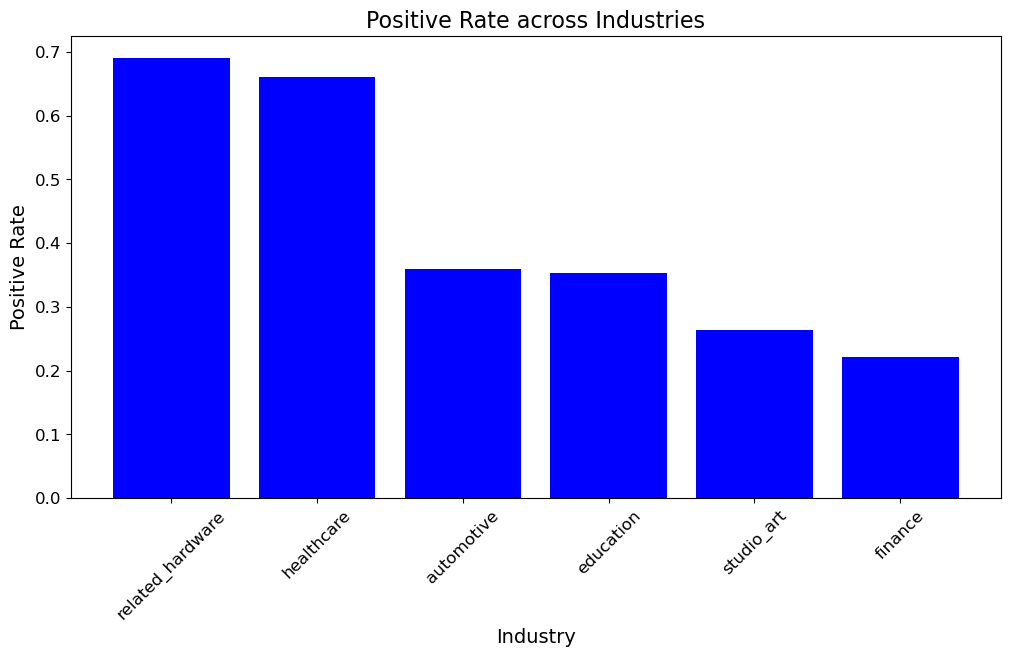

In [395]:
positive_industry = positive_industry.sort_values('Positive Rate', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(positive_industry['ktrain_topic'], positive_industry['Positive Rate'], color='blue')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Positive Rate', fontsize=14)
plt.title('Positive Rate across Industries', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [396]:
negative_industry = topic_summary.sort_values('Negative Rate', ascending=False).iloc[[0, 2, 6, 7, 8, 9], [0, 7]]
negative_industry

,ktrain_topic,Negative Rate
6,finance,0.230280
2,automotive,0.115096
9,studio_art,0.024215
7,healthcare,0.023266
8,related_hardware,0.019687
5,education,0.015368


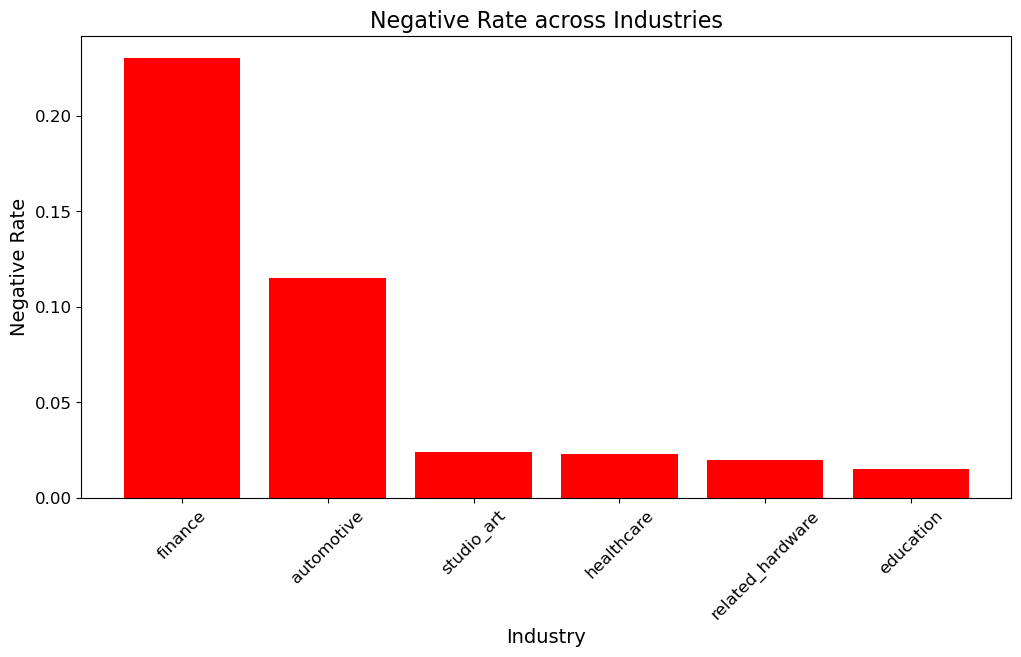

In [397]:
negative_industry = negative_industry.sort_values('Negative Rate', ascending=False)

plt.figure(figsize=(12,6))
plt.bar(negative_industry['ktrain_topic'], negative_industry['Negative Rate'], color='red')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Negative Rate', fontsize=14)
plt.title('Negative Rate across Industries', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


#### Choosing Industry/Topics

By Keywords-based method:

* Marketing, Healthcare and Design are the most controversial industries when it comes to AI/DS/ML

* Biotechnology, Telecommunications, and Healthcare may be positively impacted most by the development of AI/DS/ML

* Writing, Art, Music ,and Eduction may be negatively impacted most by the development of AI/DS/ML

By Ktrain-based method:
* Healthcare, Finance, and Studio Art are the most controversial industries when it comes to AI/DS/ML 

* Healthcare,  Automotive and Education may be positively impacted most by the development of AI/DS/ML
  
* Finance, Automative and Studio Art may be negatively impacted most by the development of AI/DS/ML

Conclusion and Choice Interested Industries:
* Healthcare: very clear in Ktrain, appear in BerTopic, TOP3 positive in keywords-based method, TOP3 positive in Ktrain-based method
  
* Automotive: very clear in Ktrain, appear in BerTopic, TOP3 positive and TOP3 negative in Ktrain-based method --> kind of controversial
  
* Studio_Art: very clear in Ktrain, appear in BerTopic, actually relevant to Writing Art Music in keywords-based method, TOP3 negative in Ktrain-based method

* Finance: very clear in Ktrain, appear in BerTopic, TOP3 negative in Ktrain-based method

* Education: very clear in Ktrain, appear in BerTopic, TOP3 positive in Ktrain-based method

* Related Hardware: very clear in Ktrain, appear in BerTopic, TOP3 positive in Ktrain-based method



In [59]:
df_healthcare = df_final[df_final.Ktrain_topic == 'healthcare'].reset_index(drop=True)
df_healthcare.shape

(7049, 8)

In [60]:
df_healthcare.head(2)

,date,domain,clean_text,sentiment_robert,sentiment_robert_prob,sentiment_ner_with_product,Ktrain_topic,year_month
0,2020-10-20,www.itbusinessnet.com,"TOKYO, Oct 20, 2020 – (ACN Newswire) – Olympus...",neutral,0.970259,...,healthcare,2020-10
1,2020-08-28,agenparl.eu,UK GOVERNMENT PROVIDES OVER £140 MILLION OF SU...,positive,0.999276,Entity ...,healthcare,2020-08


In [61]:
df_automotive = df_final[df_final.Ktrain_topic == 'automotive'].reset_index(drop=True)
df_automotive.shape

(1199, 8)

In [62]:
df_studio_art = df_final[df_final.Ktrain_topic == 'studio_art'].reset_index(drop=True)
df_studio_art.shape

(3345, 8)

In [63]:
df_finance = df_final[df_final.Ktrain_topic == 'finance'].reset_index(drop=True)
df_finance.shape

(3613, 8)

In [64]:
df_education = df_final[df_final.Ktrain_topic == 'education'].reset_index(drop=True)
df_education.shape

(2733, 8)

In [65]:
df_hardware = df_final[df_final.Ktrain_topic == 'related_hardware'].reset_index(drop=True)
df_hardware.shape

(2489, 8)

In [66]:
df_healthcare.to_pickle('df_healthcare.pkl')
df_automotive.to_pickle('df_automotive.pkl')
df_studio_art.to_pickle('df_studio_art.pkl')
df_finance.to_pickle('df_finance.pkl')
df_education.to_pickle('df_education.pkl')
df_hardware.to_pickle('df_hardware.pkl')

## Industry Analysis

#### Timeline Analysis

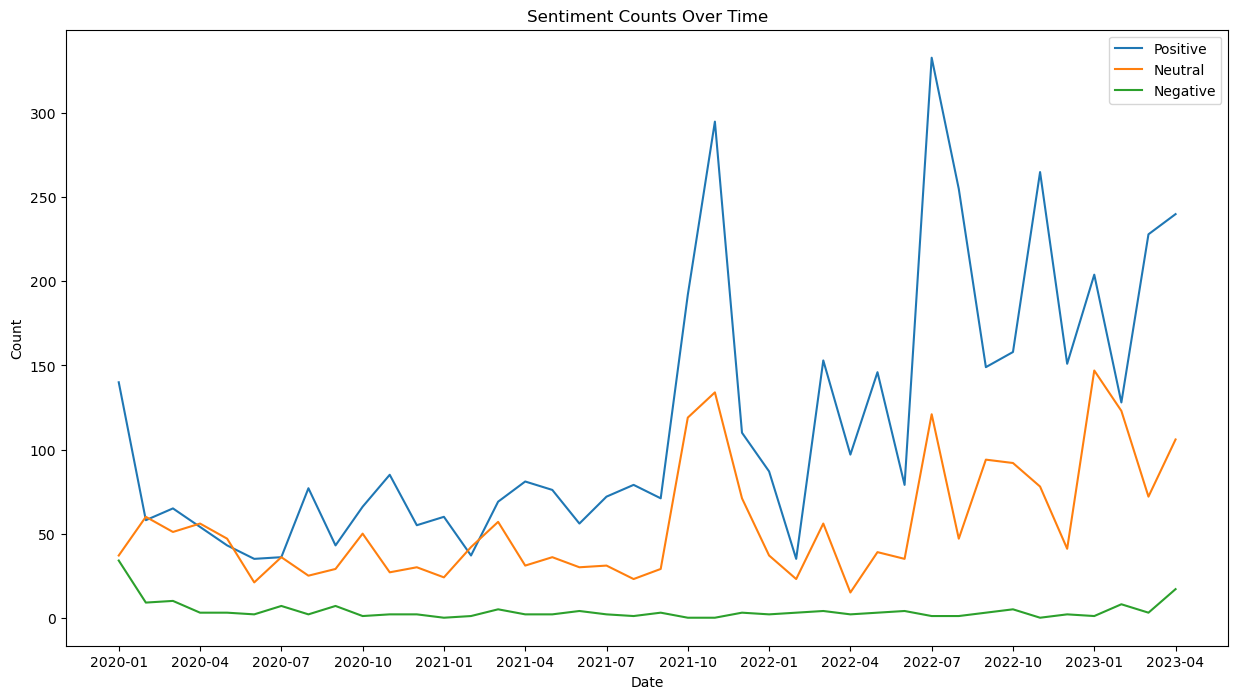

In [67]:
plot_sentiment_timeline(df_healthcare)

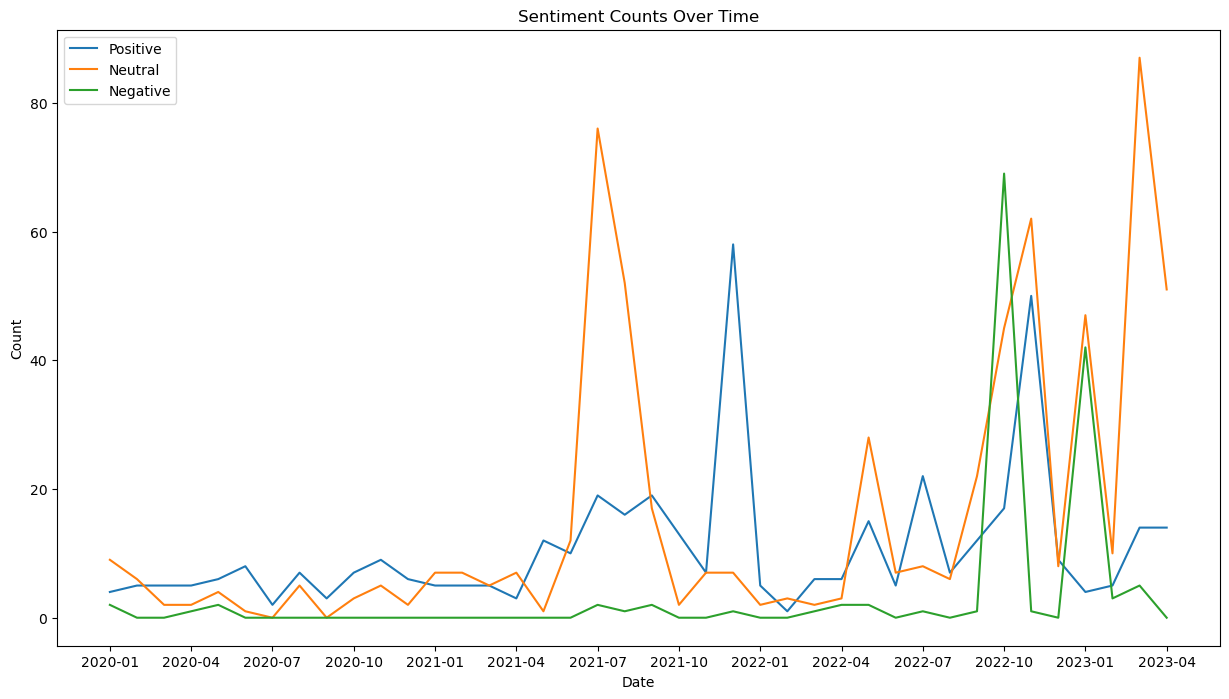

In [68]:
plot_sentiment_timeline(df_automotive)

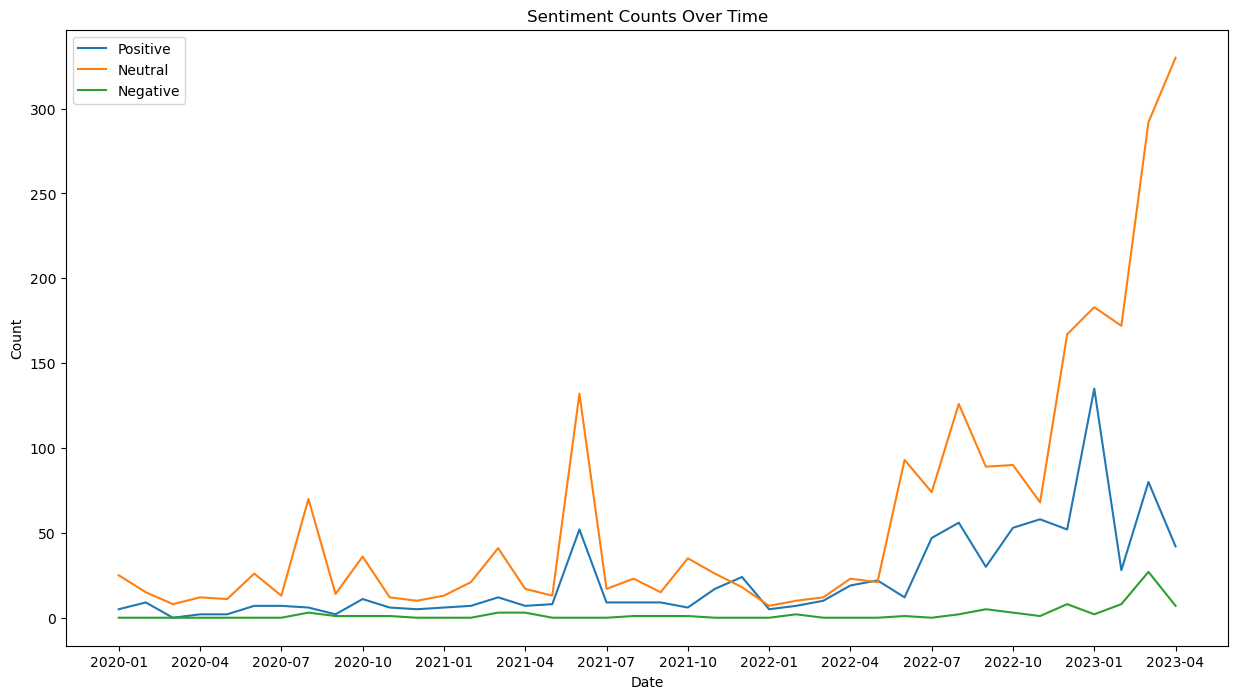

In [69]:
plot_sentiment_timeline(df_studio_art)

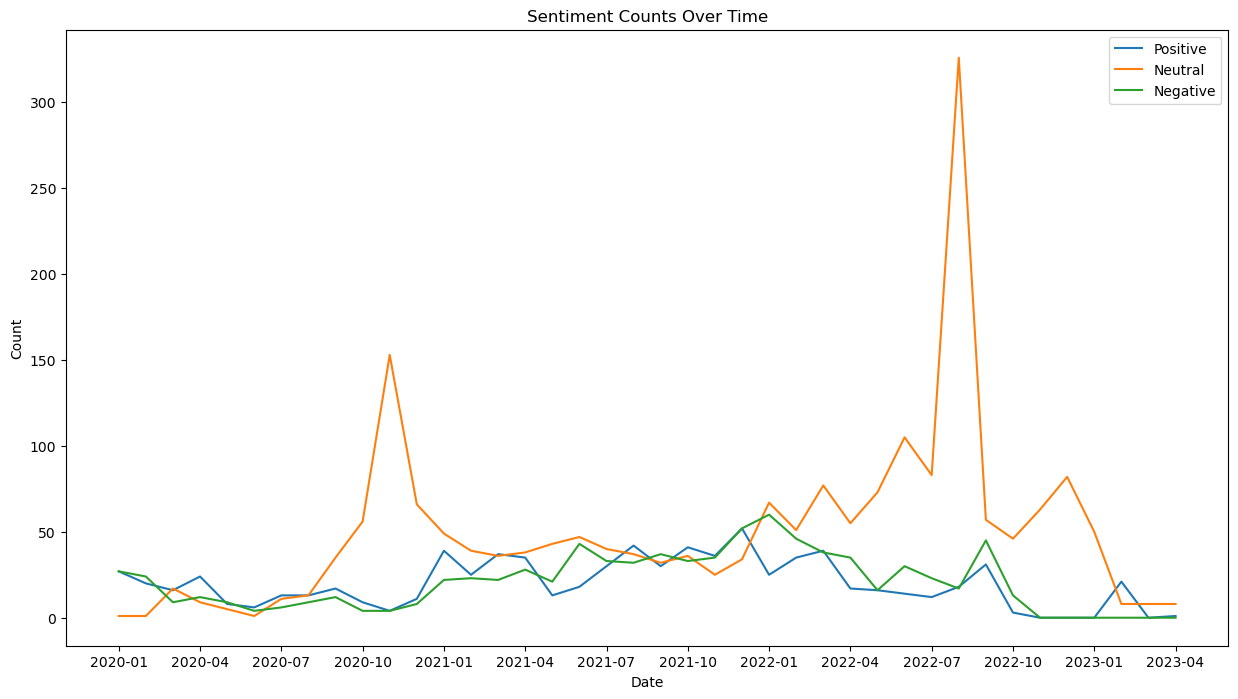

In [70]:
plot_sentiment_timeline(df_finance)

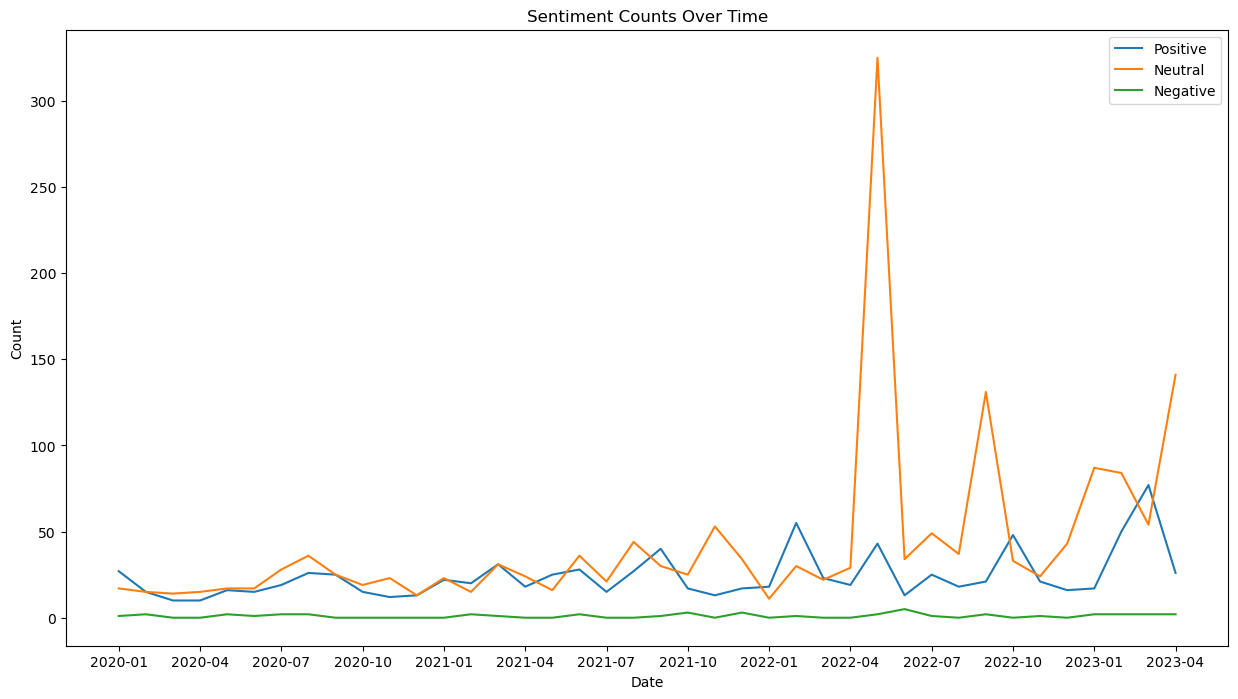

In [71]:
plot_sentiment_timeline(df_education)

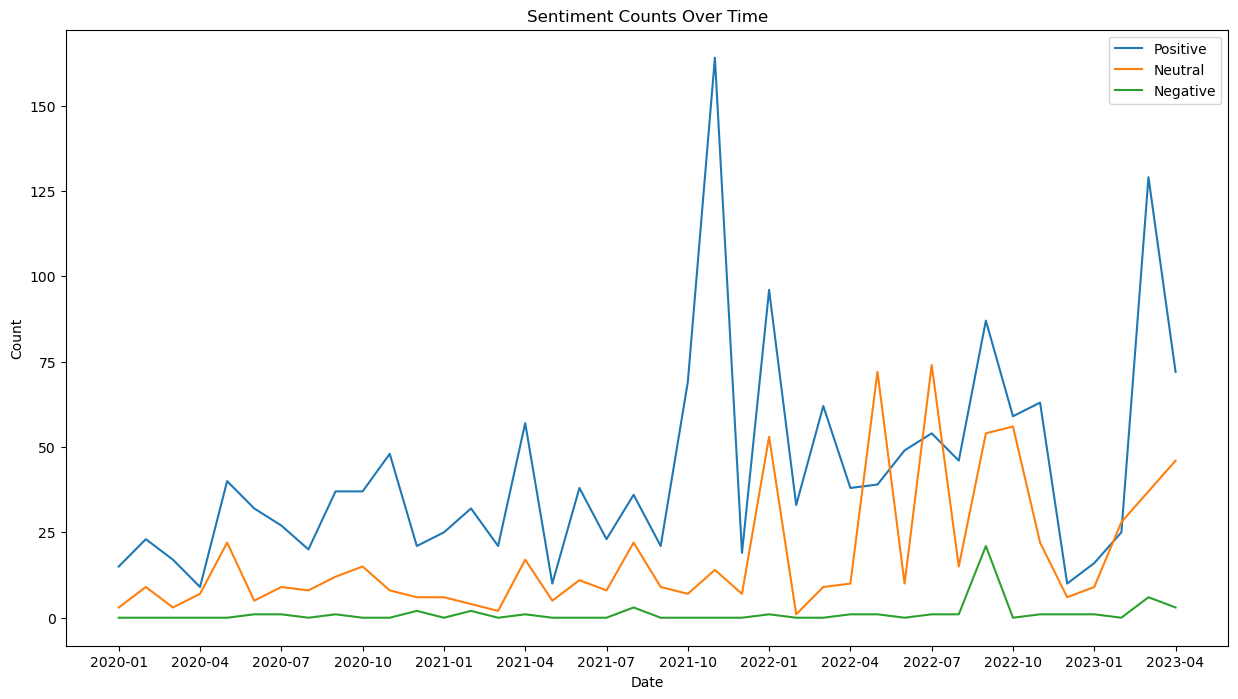

In [72]:
plot_sentiment_timeline(df_hardware)

#### NER Sentiment Analysis

##### Healthcare (positive)

In [74]:
df_healthcare.head(1)

,date,domain,clean_text,sentiment_robert,sentiment_robert_prob,sentiment_ner_with_product,Ktrain_topic,year_month
0,2020-10-20,www.itbusinessnet.com,"TOKYO, Oct 20, 2020 – (ACN Newswire) – Olympus...",neutral,0.970259,...,healthcare,2020-10


In [75]:
healthcare_ner_sentiment = pd.concat(df_healthcare['sentiment_ner_with_product'].tolist())

In [76]:
analyze_entity(healthcare_ner_sentiment, 'ORG', 100, 'average_sentiment', False, 10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
36320,TGH Innoventures,ORG,162.7824,176,0.924900,176,0
42826,healthcare,ORG,788.4325,878,0.897987,857,11
18813,Invaryant,ORG,120.2200,140,0.858714,140,0
1077,ATCOR,ORG,120.2200,140,0.858714,140,0
5901,Brainomix,ORG,118.3506,141,0.839366,134,0
30846,QP-Prostate,ORG,82.2745,104,0.791101,104,0
36573,Tampa General Hospital,ORG,175.2796,224,0.782498,222,1
43445,smart healthcare,ORG,89.5297,120,0.746081,120,0
1806,Aidoc,ORG,175.5940,242,0.725595,230,6
2445,Amazon Web Services,ORG,96.7164,136,0.711150,132,4



Invaryant: Invaryant is a health tech company dedicated to building a new kind of personal health record system that allows patients to take better control of their medical information. Invaryant's mission is to make medical information accessible, secure, private, and completely under individual control.

ATCOR: AtCor Medical is an Australian-based medical device company focused on developing technologies for non-invasive vascular management and blood pressure measurement.

Brainomix: Brainomix is a UK-based med-tech company specializing in providing AI solutions to support decision-making in the diagnosis and treatment of stroke. Their primary product is the e-Stroke Suite, a software that automatically identifies and interprets head CT scan images to help doctors diagnose stroke quickly and accurately.

Aidoc: Aidoc is a medical AI company offering advanced AI software that helps physicians quickly identify signs of serious diseases. The company's algorithms are specifically designed to analyze CT scan images, and they can detect a variety of different abnormalities such as cerebral hemorrhage, intracranial tumors, cervical injuries, etc., in a short period of time.


In [304]:
df_healthcare_org = analyze_entity(healthcare_ner_sentiment, 'ORG', 100, 'average_sentiment', False, 100)
df_healthcare_org.head(10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
36320,TGH Innoventures,ORG,162.7824,176,0.924900,176,0
42826,healthcare,ORG,788.4325,878,0.897987,857,11
18813,Invaryant,ORG,120.2200,140,0.858714,140,0
1077,ATCOR,ORG,120.2200,140,0.858714,140,0
5901,Brainomix,ORG,118.3506,141,0.839366,134,0
30846,QP-Prostate,ORG,82.2745,104,0.791101,104,0
36573,Tampa General Hospital,ORG,175.2796,224,0.782498,222,1
43445,smart healthcare,ORG,89.5297,120,0.746081,120,0
1806,Aidoc,ORG,175.5940,242,0.725595,230,6
2445,Amazon Web Services,ORG,96.7164,136,0.711150,132,4


In [305]:
entities_to_drop = ['healthcare', 'smart healthcare']

rows_to_drop = df_healthcare_org[df_healthcare_org['Entity'].isin(entities_to_drop)].index

df_healthcare_org = df_healthcare_org.drop(rows_to_drop)
df_healthcare_org.head(10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
36320,TGH Innoventures,ORG,162.7824,176,0.924900,176,0
18813,Invaryant,ORG,120.2200,140,0.858714,140,0
1077,ATCOR,ORG,120.2200,140,0.858714,140,0
5901,Brainomix,ORG,118.3506,141,0.839366,134,0
30846,QP-Prostate,ORG,82.2745,104,0.791101,104,0
36573,Tampa General Hospital,ORG,175.2796,224,0.782498,222,1
1806,Aidoc,ORG,175.5940,242,0.725595,230,6
2445,Amazon Web Services,ORG,96.7164,136,0.711150,132,4
13484,FaceHeart,ORG,166.3445,235,0.707849,235,0
16608,Health Canada,ORG,131.4714,186,0.706835,172,2


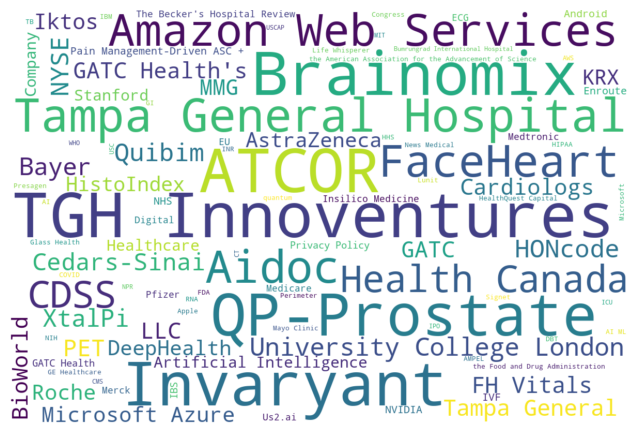

In [306]:
get_word_cloud(df_healthcare_org)

In [261]:
df_healthcare_product_wc = analyze_entity(healthcare_ner_sentiment, 'PRODUCT', 8, 'average_sentiment', False, 100)
analyze_entity(healthcare_ner_sentiment, 'PRODUCT', 10, 'average_sentiment', False, 24)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
42937,in10,PRODUCT,44.2372,47,0.941217,47,0
21410,LTC,PRODUCT,27.4550,34,0.807500,34,0
43325,qBallooning2,PRODUCT,20.9376,27,0.775467,27,0
9277,Contour,PRODUCT,11.0595,15,0.737300,15,0
19359,JavaScript,PRODUCT,15.8137,25,0.632548,25,0
13264,EyeArt AI,PRODUCT,27.4363,44,0.623552,42,0
7597,Carol,PRODUCT,9.2149,17,0.542053,17,0
29713,Phase 2,PRODUCT,16.7561,32,0.523628,29,1
29456,Perimeter B-Series,PRODUCT,12.5268,25,0.501072,23,1
34848,SnapshotsDeals,PRODUCT,33.8816,68,0.498259,58,8


In [267]:
health_care_product_noise = [
    'in10', 'LTC', 'JavaScript', 'SnapshotsDeals', 'CamFish', 'Contour', 'Carol'
]
rows_to_drop = df_healthcare_product_wc[df_healthcare_product_wc['Entity'].isin(health_care_product_noise)].index
df_healthcare_product_wc = df_healthcare_product_wc.drop(rows_to_drop)
df_healthcare_product_wc = df_healthcare_product_wc[df_healthcare_product_wc.Entity.str.len() < 30]

In [268]:
df_healthcare_product_wc.Entity.head(20)

17895                             ISDN
3912                          Atomwise
43325                     qBallooning2
21849                            Learn
13264                        EyeArt AI
29711                          Phase 1
29713                          Phase 2
29456               Perimeter B-Series
7249                          CamsFish
33801                   SeasonRadarCap
10110        DameHigh SchoolSouth Bend
15571                         GoodToys
39667    UsLiveNewsLocalEventsAir 3Now
10661              DeepHeatlh Saige-DX
33954                        SenseTime
9140                 Concordance Atlas
38720                         TytoCare
1050                              ASCO
379                              ADAM9
19072                             JMIR
Name: Entity, dtype: object

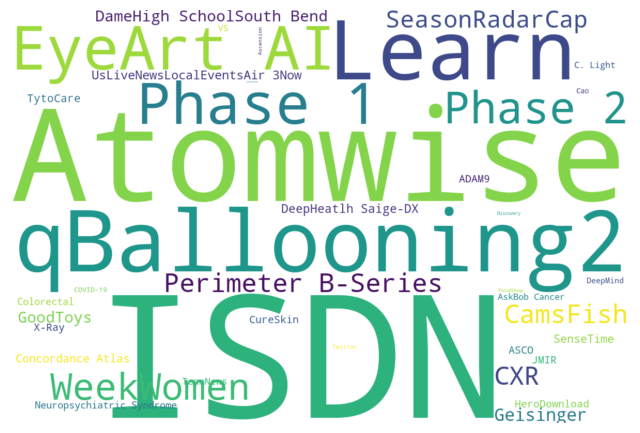

In [307]:
get_word_cloud(df_healthcare_product_wc)

##### Finance (negative)

In [80]:
finance_ner_sentiment = pd.concat(df_finance['sentiment_ner_with_product'].tolist())

In [96]:
df_finance_histogram = analyze_entity(finance_ner_sentiment, 'ORG', 100, 'average_sentiment', True, 12)
analyze_entity(finance_ner_sentiment, 'ORG', 100, 'average_sentiment', True, 12)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
7246,EGX,ORG,-12.3535,136,-0.090835,1,44
10786,ICP,ORG,-27.2320,315,-0.086451,0,92
2159,Apple Has Bigger PlansGoogle Discounts Pixel,ORG,-8.5701,105,-0.081620,42,61
272,AAVE,ORG,-11.2480,139,-0.080921,0,38
7027,Dogecoin,ORG,-16.1262,205,-0.078664,2,55
24723,XLM,ORG,-9.7680,128,-0.076312,0,33
19631,SHIB,ORG,-24.5680,324,-0.075827,0,83
19818,SYS,ORG,-28.7120,391,-0.073432,0,97
6297,DOGE,ORG,-29.0080,396,-0.073253,0,98
21581,THETA,ORG,-27.8240,380,-0.073221,0,94


In [98]:
df_finance_histogram = df_finance_histogram[df_finance_histogram.Entity != 'Apple Has Bigger PlansGoogle Discounts Pixel']
df_finance_histogram = df_finance_histogram[df_finance_histogram.Entity != 'Receive Access Ecosystem']
df_finance_histogram.head(12)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
7246,EGX,ORG,-12.3535,136,-0.090835,1,44
10786,ICP,ORG,-27.2320,315,-0.086451,0,92
272,AAVE,ORG,-11.2480,139,-0.080921,0,38
7027,Dogecoin,ORG,-16.1262,205,-0.078664,2,55
24723,XLM,ORG,-9.7680,128,-0.076312,0,33
19631,SHIB,ORG,-24.5680,324,-0.075827,0,83
19818,SYS,ORG,-28.7120,391,-0.073432,0,97
6297,DOGE,ORG,-29.0080,396,-0.073253,0,98
21581,THETA,ORG,-27.8240,380,-0.073221,0,94
24751,XRP,ORG,-87.3200,1227,-0.071165,0,295


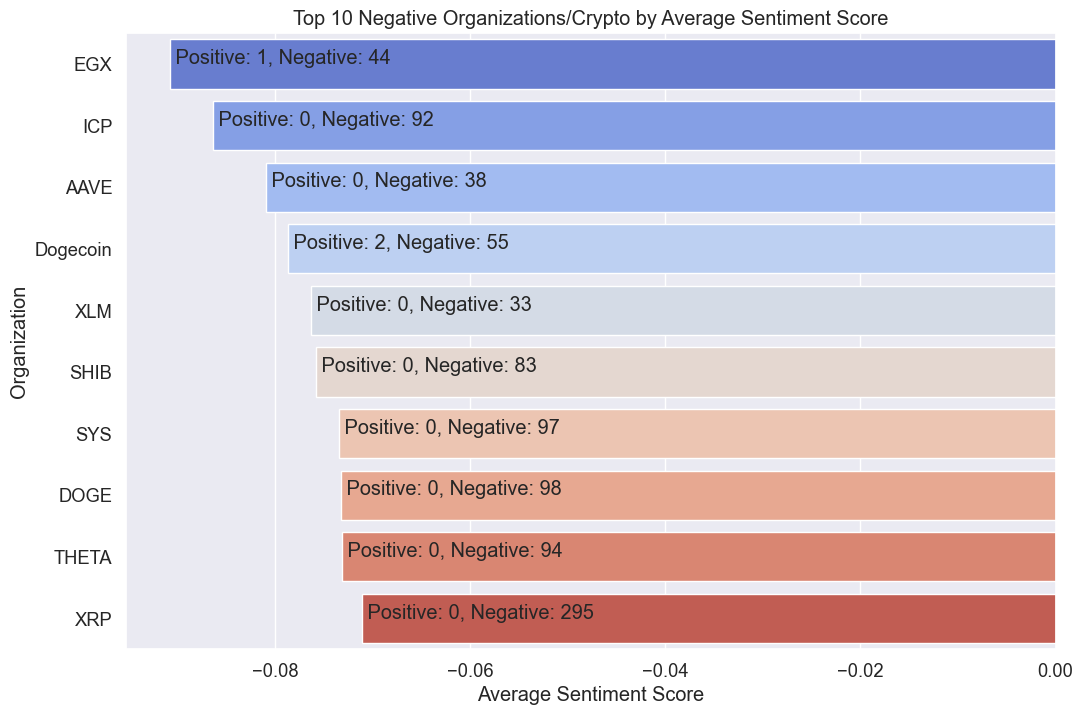

In [419]:
import seaborn as sns

# Assuming your data is in a dataframe named df
df_finance_histogram = df_finance_histogram.sort_values('average_sentiment')

plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.barplot(x='average_sentiment', y='Entity', data=df_finance_histogram, palette='coolwarm')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Organization')
plt.title('Top 10 Negative Organizations/Crypto by Average Sentiment Score')
for i, (p,n) in enumerate(zip(df_finance_histogram['positive_count'], df_finance_histogram['negative_count'])):
    plt.text(df_finance_histogram['average_sentiment'].iloc[i], i, f" Positive: {p}, Negative: {n}")
plt.show()

##### Automotive (controversial)

In [86]:
automotive_ner_sentiment = pd.concat(df_automotive['sentiment_ner_with_product'].tolist())

In [90]:
analyze_entity(automotive_ner_sentiment, 'ORG', 100, 'average_sentiment', False, 10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
1712,CleanTechnica,ORG,49.7350,125,0.397880,87,6
7965,Toyota,ORG,46.9076,147,0.319099,88,15
922,Baidu,ORG,42.2701,135,0.313112,85,10
7954,Toru Yamanaka,ORG,35.4628,118,0.300532,80,0
3250,Google,ORG,32.7005,114,0.286846,70,8
4561,Loovic,ORG,57.4248,201,0.285696,155,0
872,BMW,ORG,48.5468,175,0.277410,102,16
137,AI,ORG,739.7851,2820,0.262335,1671,343
3624,Hyundai,ORG,27.2141,109,0.249671,73,28
2919,Ford Motor Co.,ORG,26.8849,120,0.224041,110,4


In [91]:
analyze_entity(automotive_ner_sentiment, 'ORG', 100, 'average_sentiment', True, 10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
4712,MWC,ORG,-4.0981,105,-0.039030,38,49
6670,SAE,ORG,0.0000,183,0.000000,0,0
7159,Sony,ORG,6.7505,102,0.066181,12,10
6622,RoybiVerse,ORG,17.3147,240,0.072145,19,0
8321,VW Group,ORG,45.0776,484,0.093136,178,122
8476,Volkswagen,ORG,33.0364,275,0.120132,76,20
615,Argo AI,ORG,22.6763,181,0.125283,87,6
2737,FSD,ORG,16.1333,125,0.129066,50,25
8497,Volvo,ORG,14.8528,110,0.135025,28,4
612,Argo,ORG,14.2059,102,0.139274,26,2


Toyota, Baidu, Google, BMW, Hyundai, and Ford Motor Co. are companies which engage in automotive produciton and autonomous driving. They tend to be comparatively viewed positively

ony, VW Group, Volkswagen, Argo AI, and Volvo are companies which engage in automotive produciton and autonomous driving. They tend to be comparatively viewed negatively

##### Education (neutral)

In [92]:
education_ner_sentiment = pd.concat(df_education['sentiment_ner_with_product'].tolist())

In [93]:
analyze_entity(education_ner_sentiment, 'ORG', 100, 'average_sentiment', False, 10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
335,AI Bio-Inspired RoboticsBiomedical RoboticsCom...,ORG,116.5287,126,0.924831,126,0
16248,MicroroboticsRobot Learning,ORG,116.5287,126,0.924831,126,0
2765,AutonomySoft RoboticsSpace Robotics,ORG,102.2358,111,0.921043,111,0
8781,EvolutionRobot,ORG,102.2358,111,0.921043,111,0
15327,Machine VisionRobotic,ORG,102.2358,111,0.921043,111,0
9559,Frontiers Frontiers ForumPress,ORG,103.9740,114,0.912053,114,0
25305,TopicsServices SocietiesNational,ORG,103.9740,114,0.912053,114,0
28360,healthcare,ORG,122.6358,143,0.857593,134,2
23130,StarFilled StarFilled StarFilled StarFilled St...,ORG,143.1494,180,0.795274,179,1
30287,the Kempner Institute for the Study of Natural,ORG,113.1533,172,0.657868,172,0


##### Studio Art (kind of negative)

In [101]:
studio_art_ner_sentiment = pd.concat(df_studio_art['sentiment_ner_with_product'].tolist())

In [102]:
analyze_entity(studio_art_ner_sentiment, 'ORG', 100, 'average_sentiment', True, 10)

,Entity,Label,total_sentiment,count,average_sentiment,positive_count,negative_count
3885,CT,ORG,-41.2492,112,-0.368296,33,78
6169,Discord,ORG,-37.1187,152,-0.244202,30,121
15040,Niwata,ORG,-61.7873,305,-0.202581,61,185
25041,"the University of California, Berkeley",ORG,-13.3703,102,-0.131081,45,53
21230,Trump,ORG,-45.4916,396,-0.114878,131,203
12608,MIT,ORG,-11.4424,157,-0.072882,36,101
3831,COVID-19,ORG,-12.5103,172,-0.072734,46,71
3807,CNN,ORG,-6.5592,190,-0.034522,56,72
20252,Tencent,ORG,-5.7364,170,-0.033744,27,50
608,AP,ORG,-14.5705,600,-0.024284,211,196


##### Hardware (positive in another way)

In [103]:
hardware_ner_sentiment = pd.concat(df_hardware['sentiment_ner_with_product'].tolist())

In [106]:
analyze_entity(hardware_ner_sentiment, 'ORG', 100, 'average_sentiment', False, 10).Entity

3358                                          CST
8698                       Infrastructure Systems
16687                        Super Micro Computer
1816     Application-Optimized Total IT Solutions
15335                                        SMCI
15856             Server Building Block Solutions
12503                                    NeuPro-M
15209                                      SAKURA
4506                                  DDN AI400X2
2028                      Artificial Intelligence
Name: Entity, dtype: object

"Super Micro Computer", also known as "SMCI", is a computer technology company headquartered in the United States. They offer a wide range of products including servers, storage devices, workstations, GPU systems, etc. Their products are extensively used in high-performance computing fields including artificial intelligence and machine learning.

"DataDirect Networks", or "DDN", is a company providing data storage and processing solutions. Their product line includes hardware solutions related to AI and machine learning. "DDN AI400X2" is one of their products.

## Technology

#### Introduction Timeline Analysis

In [169]:
from datetime import datetime

In [170]:

lowercase_technology = [tech.lower() for tech in technology]
earliest_dates = {tech: datetime.today().date() for tech in technology}

for idx, row in df_final.iterrows():
    date = row['date']  
    text = row['clean_text'].lower()  


    for idx, tech in enumerate(lowercase_technology):
        if tech in text:

            earliest_dates[technology[idx]] = min(date, earliest_dates[technology[idx]])

# remove no show technologies
earliest_dates = {tech: date for tech, date in earliest_dates.items() if date != datetime.today().date()}

print(earliest_dates)



C:\Users\Eason Peng\AppData\Local\Temp\ipykernel_29616\1067326510.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  earliest_dates[technology[idx]] = min(date, earliest_dates[technology[idx]])


{'Decentralized Machine Learning': Timestamp('2020-01-01 00:00:00'), 'Lisk Machine Learning': Timestamp('2020-01-01 00:00:00'), 'Matrix AI Network': Timestamp('2020-01-01 00:00:00'), 'Auto ML': Timestamp('2020-02-17 00:00:00'), 'GNN': Timestamp('2020-01-24 00:00:00'), 'LLM': Timestamp('2020-01-02 00:00:00'), ' Bard ': Timestamp('2020-01-13 00:00:00'), ' NPR ': Timestamp('2020-01-02 00:00:00'), 'ChatGPT': Timestamp('2022-12-01 00:00:00'), 'Bing': Timestamp('2020-01-01 00:00:00'), 'Ernie Bot': Timestamp('2023-02-07 00:00:00'), 'Character AI': Timestamp('2020-01-20 00:00:00'), 'CoPilot': Timestamp('2020-01-15 00:00:00'), 'IoT': Timestamp('2020-01-01 00:00:00'), 'MidJourney': Timestamp('2022-04-26 00:00:00'), 'Writesonic': Timestamp('2021-03-23 00:00:00'), 'Jasper': Timestamp('2020-01-23 00:00:00'), 'HER AI': Timestamp('2020-01-02 00:00:00'), 'Stable Difussion': Timestamp('2022-09-26 00:00:00'), 'Stability AI': Timestamp('2022-08-12 00:00:00'), 'Leonardo': Timestamp('2020-01-01 00:00:00'),

C:\Users\Eason Peng\AppData\Local\Temp\ipykernel_29616\1067326510.py:15: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  earliest_dates = {tech: date for tech, date in earliest_dates.items() if date != datetime.today().date()}


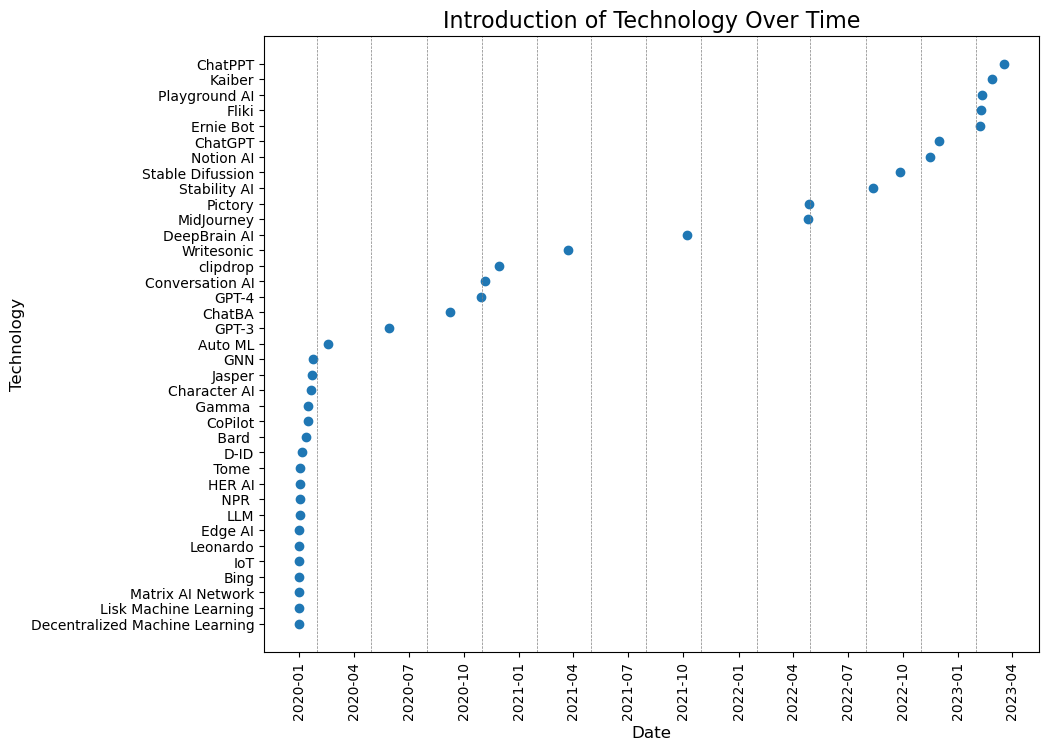

In [172]:
import matplotlib.dates as mdates

sorted_technologies = sorted(earliest_dates.items(), key=lambda item: item[1])

dates = [item[1] for item in sorted_technologies]
names = [item[0] for item in sorted_technologies]

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dates, names)


ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  


plt.xticks(rotation=90)


plt.title('Introduction of Technology Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Technology', fontsize=12)


min_date = min(dates)
max_date = max(dates)
daterange = pd.date_range(start=min_date, end=max_date, freq='3M')

for date in daterange:
    plt.axvline(x=date, color='grey', linestyle='--', linewidth=0.5)

plt.show()



#### Popularity Timeline Analysis

In [189]:
ai_technology_classification = {
    "AI Chatbots and Language Processing": ['GPT-3', 'GPT-4', 'Bard', 'Ernie Bot', 'ChatGPT', 'ChatBA', 'Conversation AI', 'Character AI'],
    "AI Content Creation": ['MidJourney', 'Writesonic', 'Jasper', 'HER AI', 'Stable Diffusion', 'Stability AI', 'Leonardo', 'Playground AI', 'Lucidpic', 'Pebblely', 'Notion AI', 'DeepBrain AI'],
    "AI Productivity Improvement": ['Gamma', 'Tome', 'ChatPPT', 'Clipdrop', 'PhotoScissors', 'D-ID', 'Kaiber', 'Pictory', 'Fliki', 'ChatExcel', 'Excelly', 'Formx.ai', 'CoPilot'],
    "AI and Machine Learning": ['Decentralized Machine Learning', 'Lisk Machine Learning', 'Matrix AI Network', 'GNN', 'LLM', 'Edge AI', 'Auto ML', 'Generative Adversarial Networks'],
    "AI in Changing Life": ['IoT', 'Autonomous Vehicles', 'Smart Home', 'AI-Enabled Medical Imaging', 'Robot-Assisted Surgery', 'Adaptive Learning Platforms', 'AI-Based EdTech']
}





In [190]:
df_tech_analysis = df_final.copy()

In [191]:
df_tech_analysis['ai_classification_counts'] = [{} for _ in range(len(df_tech_analysis))]

for i, row in df_tech_analysis.iterrows():
    text = row['clean_text']
    for category, tech_list in ai_technology_classification.items():
        df_tech_analysis.at[i, 'ai_classification_counts'][category] = sum([text.count(tech) > 0 for tech in tech_list])


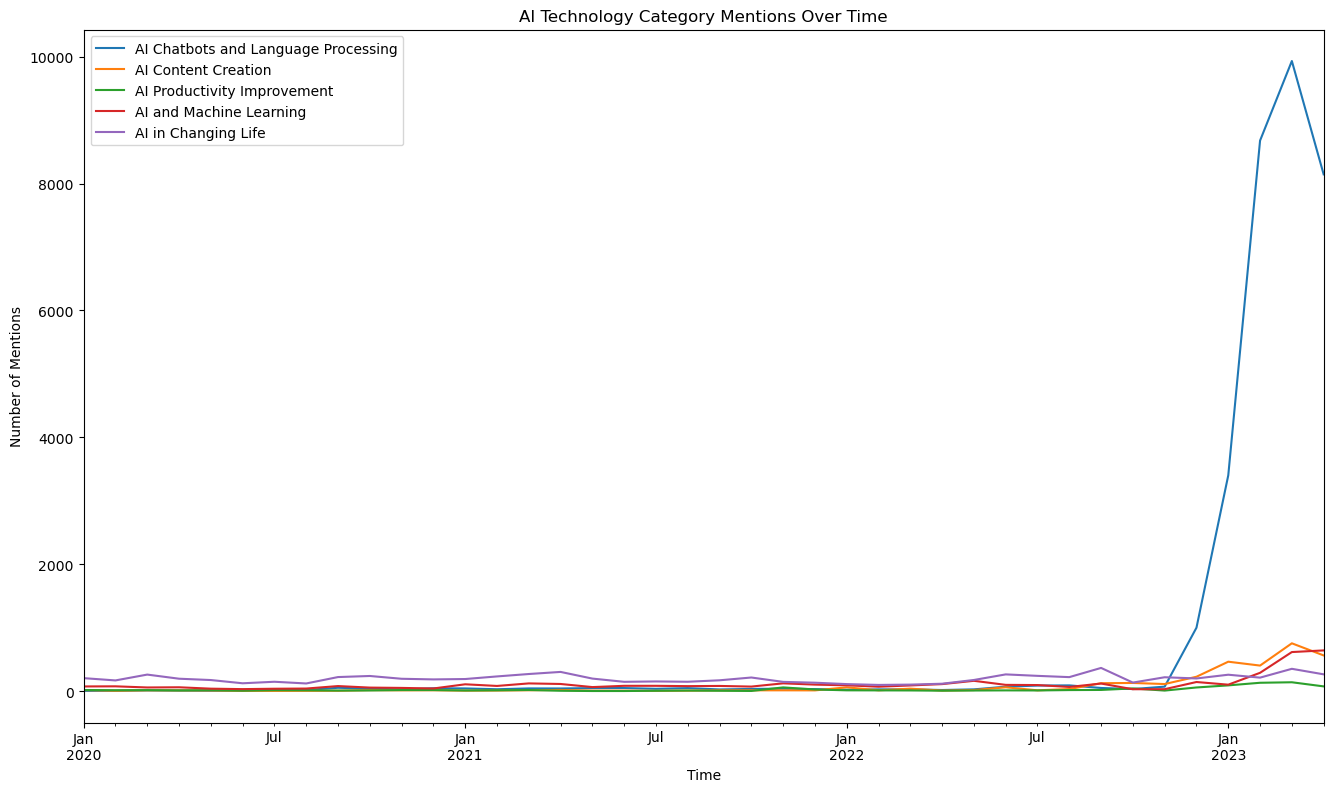

In [209]:
timeline_df = pd.DataFrame()

for category in ai_technology_classification.keys():
    timeline_df[category] = df_tech_analysis.groupby('year_month')['ai_classification_counts'].apply(lambda x: sum([item.get(category, 0) for item in x])).values

timeline_df['year_month'] = sorted(pd.to_datetime(df_tech_analysis['year_month'].unique()))
timeline_df.set_index('year_month', inplace=True) 
timeline_df = timeline_df.sort_index()

timeline_df.plot(figsize=(16, 9))
plt.title('AI Technology Category Mentions Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Mentions')
plt.show()


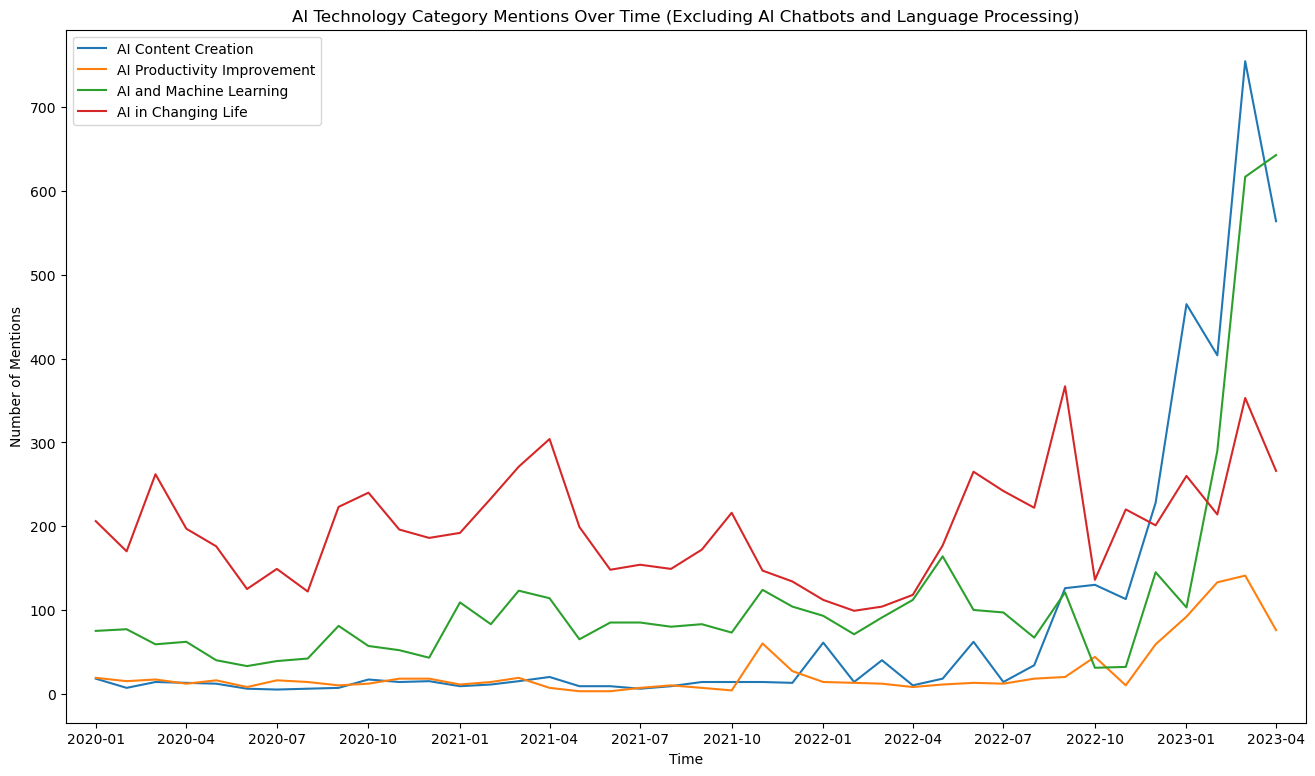

In [216]:
fig, ax = plt.subplots(figsize=(16, 9))

months = mdates.MonthLocator(interval=3)
months_fmt = mdates.DateFormatter('%Y-%m')

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(months_fmt)

for category in included_categories:
    ax.plot(timeline_df[category], label=category)

plt.title('AI Technology Category Mentions Over Time (Excluding AI Chatbots and Language Processing)')
plt.xlabel('Time')
plt.ylabel('Number of Mentions')

ax.set_xlim(timeline_df.index.min() - pd.DateOffset(days=30), timeline_df.index.max() + pd.DateOffset(days=30))

# Add this line to display the legend
plt.legend()

plt.show()


#### What kind of applications cannot be transformed by AI

In [32]:
job_list = [job for job in sum(job_types_dictionary.values(), [])]
len(job_list)


100

In [33]:
# Create a dictionary that maps each job to its industry
job_to_industry = {}
for industry, jobs in job_types_dictionary.items():
    for job in jobs:
        job_to_industry[job.lower()] = industry
        job_to_industry[job] = industry


df_job_types = {}

for job in job_list:
    df_job_types[job] = df_filtered[df_filtered['clean_text'].str.contains(job, case=False)]
    
summary = []
for job, df in df_job_types.items():
    num_news = len(df)
    sum_score = df['sentiment_score_vader_customized'].sum()
    avg_score = df['sentiment_score_vader_customized'].mean()
    positive_count = df[df.sentiment_vader_customized == 'Positive'].shape[0]
    neutral_count = df[df.sentiment_vader_customized == 'Neutral'].shape[0]
    negative_count = df[df.sentiment_vader_customized == 'Negative'].shape[0]
    
    # Calculate rates with handling division by zero
    positive_rate = positive_count / num_news if num_news != 0 else np.nan
    neutral_rate = neutral_count / num_news if num_news != 0 else np.nan
    negative_rate = negative_count / num_news if num_news != 0 else np.nan
    
    # Retrieve the industry associated with the job
    industry = job_to_industry.get(job, "Unknown")
    
    summary.append([job, industry, num_news, sum_score, avg_score, positive_rate, neutral_rate, negative_rate])

jobs_summary = pd.DataFrame(summary, columns=['Job Type', 'Industry', 'Number of News', 'Total Sentiment Score', 'Average Sentiment Score'
                                            , 'Positive Rate', 'Neutral Rate', 'Negative Rate'])


In [34]:
jobs_summary

,Job Type,Industry,Number of News,Total Sentiment Score,Average Sentiment Score,Positive Rate,Neutral Rate,Negative Rate
0,Nurse,Healthcare,1503,1039.7315,0.691771,0.855622,0.001331,0.143047
1,Doctor,Healthcare,7353,5259.5025,0.715287,0.865769,0.000408,0.133823
2,Pharmacist,Healthcare,140,106.1538,0.758241,0.878571,0.000000,0.121429
3,Medical Technologist,Healthcare,0,0.0000,NaN,NaN,NaN,NaN
4,Physical Therapist,Healthcare,16,10.1141,0.632131,0.812500,0.000000,0.187500
...,...,...,...,...,...,...,...,...
95,Writer,Writing,7628,6134.8295,0.804251,0.906529,0.002360,0.091112
96,Editor,Writing,16856,13298.8913,0.788971,0.905731,0.004687,0.089582
97,Technical Writer,Writing,26,23.8663,0.917935,0.961538,0.000000,0.038462
98,Content Strategist,Writing,16,15.6237,0.976481,1.000000,0.000000,0.000000


In [35]:
jobs_summary.sort_values(by='Number of News', ascending=False).head(5)

,Job Type,Industry,Number of News,Total Sentiment Score,Average Sentiment Score,Positive Rate,Neutral Rate,Negative Rate
45,Actor,Entertainment,36723,31914.6663,0.869065,0.939003,0.000191,0.060807
99,Author,Writing,23524,17036.4631,0.724216,0.870813,0.001998,0.127189
96,Editor,Writing,16856,13298.8913,0.788971,0.905731,0.004687,0.089582
37,Professor,Education,11760,8491.9190,0.722102,0.870323,0.000595,0.129082
61,Architect,Construction,8788,8106.2126,0.922418,0.972576,0.000455,0.026969


In [36]:
jobs_summary.sort_values(by='Average Sentiment Score', ascending=False).head(5)

,Job Type,Industry,Number of News,Total Sentiment Score,Average Sentiment Score,Positive Rate,Neutral Rate,Negative Rate
17,Assembly Operator,Manufacturing,1,0.9995,0.999500,1.0,0.0,0.0
83,Distribution Manager,Logistics,1,0.9992,0.999200,1.0,0.0,0.0
94,Clinical Research Associate,Biotechnology,1,0.9988,0.998800,1.0,0.0,0.0
79,E-commerce Manager,E-commerce,1,0.9988,0.998800,1.0,0.0,0.0
26,Logistics Manager,Transportation,3,2.9942,0.998067,1.0,0.0,0.0


In [37]:
jobs_summary.sort_values(by='Positive Rate', ascending=False).head(5)

,Job Type,Industry,Number of News,Total Sentiment Score,Average Sentiment Score,Positive Rate,Neutral Rate,Negative Rate
78,Digital Marketer,E-commerce,99,95.9214,0.968903,1.0,0.0,0.0
17,Assembly Operator,Manufacturing,1,0.9995,0.999500,1.0,0.0,0.0
79,E-commerce Manager,E-commerce,1,0.9988,0.998800,1.0,0.0,0.0
83,Distribution Manager,Logistics,1,0.9992,0.999200,1.0,0.0,0.0
53,Product Designer,Design,98,93.1934,0.950953,1.0,0.0,0.0


In [38]:
jobs_summary.sort_values(by='Average Sentiment Score', ascending=True).head(5)

,Job Type,Industry,Number of News,Total Sentiment Score,Average Sentiment Score,Positive Rate,Neutral Rate,Negative Rate
90,Biotechnologist,Biotechnology,2,0.0034,0.001700,0.500000,0.0,0.500000
18,Maintenance Technician,Manufacturing,3,1.0401,0.346700,0.666667,0.0,0.333333
36,School Counselor,Education,6,2.2450,0.374167,0.666667,0.0,0.333333
69,Curator,Art,568,281.4503,0.495511,0.767606,0.0,0.232394
27,Flight Attendant,Transportation,137,68.0554,0.496755,0.737226,0.0,0.262774


In [39]:
jobs_summary.sort_values(by='Negative Rate', ascending=False).head(5)

,Job Type,Industry,Number of News,Total Sentiment Score,Average Sentiment Score,Positive Rate,Neutral Rate,Negative Rate
90,Biotechnologist,Biotechnology,2,0.0034,0.001700,0.500000,0.0,0.500000
18,Maintenance Technician,Manufacturing,3,1.0401,0.346700,0.666667,0.0,0.333333
36,School Counselor,Education,6,2.2450,0.374167,0.666667,0.0,0.333333
27,Flight Attendant,Transportation,137,68.0554,0.496755,0.737226,0.0,0.262774
69,Curator,Art,568,281.4503,0.495511,0.767606,0.0,0.232394
